<a href="https://colab.research.google.com/github/alanoudalsanad/Mining-project/blob/main/copy_of_final_report_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### 1. **Problem**

Heart disease remains one of the most serious global health challenges, often resulting from unrecognized warning signs and late diagnosis. This project aims to analyze patient health data to predict the risk of heart disease at an early stage, allowing both individuals and healthcare professionals to take preventive measures in time.

Early identification plays a vital role in saving lives, reducing severe complications, and easing the pressure on healthcare systems. By leveraging data mining techniques, this project seeks to uncover hidden patterns that can help in detecting potential heart conditions before they become critical.


 ### 2. **Data Mining Task**

In this project, we apply two main data mining tasks  classification and clustering  to analyze and predict heart disease risks.

For classification, the goal is to train a predictive model that determines whether a patient is at risk or not at risk of heart disease based on medical and lifestyle factors such as age, cholesterol, blood pressure, heart rate, and diabetes. The classification process focuses on the heart disease status as the target class to accurately identify individuals who may require early medical attention.

For clustering, the objective is to group patients with similar health patterns into distinct clusters without using the target class. This unsupervised task helps reveal underlying relationships among features and highlights common traits between patients. Through clustering, we aim to gain deeper insights into different risk groups and uncover hidden patterns that may support preventive strategies and early intervention.

 ### 3. **Data**



The dataset was obtained from Kaggle. Link: https://www.kaggle.com/datasets/rabieelkharoua/diabetes-health-dataset-analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr



df = pd.read_csv("Dataset/Raw_dataset.csv")

This dataset contains comprehensive health data for 1,879 patients, uniquely identified with IDs ranging from 6000 to 7878.The data includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

**Dataset Information:**
Number and data types of attributes (features)= 46 attribute.

Number of objects (instances/records) = 1879 record.

Class attribute: Diagnosis

#4. **Data preprocessing**
improve the quality of the data and to prepare it for the subsequent classification and clustering tasks. All operations were performed on a copy of the original dataset, and the raw data were kept unchanged in a separate file (Raw_dataset.csv). The final preprocessed version was saved as Preprocessed_dataset.csv for use in Phase 3.

**4.1 Initial data quality checks**

Before applying any transformations, we conducted basic quality checks on the dataset:

**Missing values:**

We checked the entire DataFrame using df.isnull().values.any(), and the result was False, indicating that there are no missing values in any attribute. Therefore, no imputation technique was required.

**Outliers and distributions:**

For all numeric attributes, we calculated the five-number summary and generated boxplots. Using the IQR method for each numeric column, we found 0 outliers across all attributes. This confirmed that the numeric features are well distributed without extreme values, so no specific outlier removal was needed.

**Class and label distributions:**

We used a histogram for Age, a scatter plot for Age vs. FastingBloodSugar, a pie chart for Gender, and a bar plot for the Diagnosis (target) variable. These plots confirmed that the class distribution is reasonably balanced and helped us understand the overall structure of the dataset before preprocessing.

**4.2 Discretization**

To make some continuous variables more interpretable and suitable for certain data mining techniques, we applied discretization to two attributes: Age and BMI.

**Age discretization:**
The continuous Age attribute (20–90 years) was converted into meaningful age groups using pd.cut() with the following bins and labels:

0–17 years → Children

18–34 years → Young_Adults

35–65 years → Older_Adults

65–120 years → Seniors

This transformation allows the model to focus on broader demographic categories instead of individual age values, which simplifies interpretation and supports group-based analysis.

**BMI discretization:**
Similarly, the continuous BMI attribute was discretized into standard clinical categories using pd.cut() with these intervals and labels:

0–18.5 → Underweight

18.5–25 → Normal

25–30 → Overweight

30–40 → Obese

Converting BMI into categorical groups helps align the dataset with familiar medical cut-offs and makes the results easier to interpret from a health perspective.

**4.3 Normalization**

Because many numeric features (for example, blood pressure, cholesterol levels, lifestyle scores, and symptom severity scores) use different scales and ranges, we applied normalization to ensure that all selected numeric attributes contribute fairly during model training.

**Method:**

We used Min–Max Scaling (MinMaxScaler) to rescale the selected numeric features to the range
0
,
1
0,1.

**Features normalized:**

The normalization was applied to a set of continuous attributes, including:

AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality,
SystolicBP, DiastolicBP, FastingBloodSugar, HbA1c,
SerumCreatinine, BUNLevels, CholesterolTotal, CholesterolLDL,
CholesterolHDL, CholesterolTriglycerides, FatigueLevels,
QualityOfLifeScore, MedicalCheckupsFrequency, MedicationAdherence,
and HealthLiteracy.

Effect and justification:
After normalization, all these features were brought to a consistent scale. This prevents variables with naturally large ranges (e.g., cholesterol or blood pressure) from dominating the learning process and improves the stability and performance of both classification and clustering algorithms.

**4.4 Feature selection**

To reduce dimensionality and focus on the most informative attributes, we performed feature selection using a Filter method based on the Spearman Rank Correlation between each numeric feature and the target variable Diagnosis (0 = No Diabetes, 1 = Diabetes).

**Procedure:**

We selected all numeric columns from the preprocessed dataset and removed the target label Diagnosis from this list.

For each remaining numeric feature, we computed the Spearman correlation coefficient with Diagnosis.

Features were sorted by the absolute value of their correlation, and the top 10 most correlated features were selected.

The final preprocessed dataset was then restricted to these top 10 features plus the Diagnosis label.

**Results and interpretation:**

The analysis showed that the most influential attributes are strongly related to glucose levels and key clinical indicators, such as FastingBloodSugar and HbA1c, which exhibited the highest correlation with the diabetes diagnosis. Other important features included symptom-related and cardiovascular attributes like FrequentUrination, Hypertension, ExcessiveThirst, and blood pressure measurements.
This confirms that the selected feature set is both clinically meaningful and predictive, reducing model complexity while preserving the most important information for the subsequent data mining tasks.







 **Attribute Dscription:**


In [ ]:
data =  data = {
    "Attribute Name": [
        "Age", "Gender", "Ethnicity", "SocioeconomicStatus", "EducationLevel", "BMI", "Smoking",
        "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "FamilyHistoryDiabetes",
        "GestationalDiabetes","PolycysticOvarySyndrome", "PreviousPreDiabetes", "Hypertension",
        "SystolicBP","DiastolicBP", "FastingBloodSugar", "HbA1c", "SerumCreatinine", "BUNLevels",
        "CholesterolTotal","CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides",
        "AntihypertensiveMedications", "Statins", "AntidiabeticMedications","FrequentUrination",
        "ExcessiveThirst", "UnexplainedWeightLoss", "FatigueLevels", "BlurredVision", "SlowHealingSores",
        "TinglingHandsFeet", "QualityOfLifeScore","HeavyMetalsExposure", "OccupationalExposureChemicals",
        "WaterQuality", "MedicalCheckupsFrequency", "MedicationAdherence", "HealthLiteracy","Diagnosis"
    ],
    "Description": [
        "The age of the patients", "Gender of the patients", "The ethnicity of the patients", "The socioeconomic status of the patients",
        "The education level of the patients", "Body Mass Index of the patients", "Smoking status", "Weekly alcohol consumption in units",
        "Weekly physical activity in hours", "Diet quality score","Sleep quality score", "Family history of diabetes", "History of gestational diabetes",
        "Presence of polycystic ovary syndrome", "History of previous pre-diabetes", "Presence of hypertension","Systolic blood pressure",
        "Diastolic blood pressure","Fasting blood sugar levels", "Hemoglobin A1c levels", "Serum creatinine levels", "Blood Urea Nitrogen levels",
        "Total cholesterol levels", "Low-density lipoprotein cholesterol levels", "High-density lipoprotein cholesterol levels","Triglycerides levels",
        "Use of antihypertensive medications", "Use of statins","Use of antidiabetic medications", "Presence of frequent urination", "Presence of excessive thirst",
        "Presence of unexplained weight loss","Fatigue levels", "Presence of blurred vision", "Presence of slow-healing sores",
        "Presence of tingling in hands or feet", "Quality of life score", "Exposure to heavy metals", "Occupational exposure to harmful chemicals", "Quality of water",
        "Frequency of medical check-ups per year", "Medication adherence score", "Health literacy score","Diagnosis status for Diabetes"
    ],
    "Data Type": [
        "Numeric", "Binary", "Nominal", "Ordinal", "Ordinal",
        "Numeric", "Binary", "Numeric", "Numeric", "Numeric",
        "Numeric", "Binary", "Binary", "Binary", "Binary", "Binary",
        "Numeric", "Numeric", "Numeric", "Numeric",
        "Numeric", "Numeric", "Numeric", "Numeric",
        "Numeric", "Numeric", "Binary", "Binary", "Binary",
        "Binary", "Binary", "Binary", "Numeric", "Binary", "Binary",
        "Binary", "Numeric", "Binary", "Binary", "Binary",
        "Numeric", "Numeric", "Numeric", "Binary"
    ],
    "Possible Values": [
        "20-90", "0(Male), 1(Female)", "0(Caucasian), 1(African American), 2(Asian), 3(Other)",
        "0(Low), 1(Middle), 2(High)", "0(None), 1(High School), 2(Bachelor's), 3(Higher)", "15-40",
        "0(No), 1(Yes)", "0-20","0-10", "0-10", "4-10", "0(No), 1(Yes)", "0(No), 1(Yes)", "0(No), 1(Yes)",
        "0(No), 1(Yes)", "0(No), 1(Yes)", "90-180 mmHg", "60 -120 mmHg","70-200 mg/dL", "4.0%-10.0%",
        "0.5-5.0 mg/dL", "5-50 mg/dL", "150-300 mg/dL", "50-200 mg/dL", "20-100 mg/dL", "50-400 mg/dL",
        "0(No), 1(Yes)","0(No), 1(Yes)", "0(No), 1(Yes)", "0(No), 1(Yes)", "0(No), 1(Yes)", "0(No), 1(Yes)",
        "0-10","0(No), 1(Yes)","0(No), 1(Yes)", "0(No), 1(Yes)","0-100", "0(No), 1(Yes)","0(No), 1(Yes)",
        "0(Good), 1(Poor)", "0-4", "0-10", "0-10","0(No), 1(Yes)"
    ]
}

attribute_df = pd.DataFrame(data)
attribute_df

,Attribute Name,Description,Data Type,Possible Values
0,Age,The age of the patients,Numeric,20-90
1,Gender,Gender of the patients,Binary,"0(Male), 1(Female)"
2,Ethnicity,The ethnicity of the patients,Nominal,"0(Caucasian), 1(African American), 2(Asian), 3..."
3,SocioeconomicStatus,The socioeconomic status of the patients,Ordinal,"0(Low), 1(Middle), 2(High)"
4,EducationLevel,The education level of the patients,Ordinal,"0(None), 1(High School), 2(Bachelor's), 3(Higher)"
5,BMI,Body Mass Index of the patients,Numeric,15-40
6,Smoking,Smoking status,Binary,"0(No), 1(Yes)"
7,AlcoholConsumption,Weekly alcohol consumption in units,Numeric,0-20
8,PhysicalActivity,Weekly physical activity in hours,Numeric,0-10
9,DietQuality,Diet quality score,Numeric,0-10


**Note:** The original dataset contained 2 extra attributes "Doctor In Charge" and "Patient Id", Since the original "Doctor In Charge" variable is all "Confidential" and the "Patient Id" is used solely to distinguish between individual patients, the model does not consider these two variables, thus they are omitted form the dataset.

# **Data summary**

In [ ]:
# Extracting the columns of 'Numeric' data type and arranging them in a list.
numeric_columns = attribute_df[attribute_df['Data Type'] == 'Numeric']['Attribute Name'].tolist()

# Create a new data frame with only 'Numeric' columns.
numeric_df = df[numeric_columns]

# Show all columns without truncation.
pd.set_option('display.max_columns', None)
summary = numeric_df.describe()
summary

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,55.043108,27.687601,10.096587,5.200790,4.895801,7.021328,134.050559,89.863757,135.204490,6.976133,2.784590,27.798153,225.006464,124.656831,60.060944,227.386167,4.949003,48.508643,1.997101,4.957539,5.011736
std,20.515839,7.190975,5.914216,2.857012,2.867144,1.729469,25.613830,17.328086,37.515750,1.739365,1.308023,12.800797,43.367170,42.911145,23.316682,101.071578,2.884483,28.758488,1.122632,2.910934,2.920908
min,20.000000,15.025898,0.000928,0.004089,0.000885,4.004336,90.000000,60.000000,70.074649,4.003089,0.500565,5.010401,150.056094,50.058252,20.014494,50.154649,0.004977,0.002390,0.004013,0.005384,0.000362
25%,38.000000,21.469981,4.789725,2.751022,2.476802,5.481789,112.000000,75.000000,102.341470,5.443856,1.654472,17.172009,186.933051,87.810946,40.011963,140.873930,2.417748,23.974098,1.057801,2.420024,2.410113
50%,55.000000,27.722988,10.173865,5.249002,4.888566,7.094692,134.000000,90.000000,137.398241,7.095732,2.855105,28.190147,225.120112,124.918023,60.456988,228.417429,4.851914,47.519693,1.987170,4.843886,5.035208
75%,73.000000,33.856460,15.285359,7.671402,7.356058,8.523814,156.000000,105.000000,167.362362,8.423211,3.898133,38.506299,263.529424,161.624444,80.059112,313.408944,7.569772,72.883179,2.946019,7.513933,7.586865
max,90.000000,39.998811,19.996231,9.993893,9.998677,9.989372,179.000000,119.000000,199.935506,9.991193,4.993974,49.975728,299.998480,199.898732,99.958394,399.885928,9.999979,99.788530,3.999715,9.997165,9.993029


# **Statistical Summary Of Numeric Attribute:**





* Age

The ages of patients range from 20 to 90 years, with an average of 55 years. The median age is 55 years suggesting a relatively balanced age distribution. The standard deviation is 20.52 indicating moderate to high variability, meaning the dataset contains both young and older individuals.

* BMI

Body Mass Index ranges from 15 to 39.9, with a mean of 27.69 and a median of 27.72 indicateing mostly overweight. The standard deviation is 7.19 showing a wide spread of BMI values, reflecting a mix of underweight, normal, overweight, and obese individuals.

* AlcoholConsumption

Weekly alcohol consumption ranges from 0.0009 to 19.99 units, with an average of 10.10 units. The median is 10.17 indicating a fairly symmetric distribution. Standard deviation is 5.91 indicating moderate variability where most people consume roughly 4 to 16 units per week.

* PhysicalActivity

Weekly physical activity ranges from 0.004 to 9.99 hours, with a mean of 5.20 and a median of 5.25 hours. The standard deviation is 2.86 indicating moderate variability among patients’ activity levels where most people engage in roughly 2 to 8 hours per week.

* DietQuality

Diet quality score ranges from 0.0009 to 9.99, with an average of 4.90 and median of 4.89. Standard deviation is 2.87 suggesting that scores are spread out but still mostly clustered around the middle among patients.

* SleepQuality

Sleep quality ranges from 4.00 to 9.99, with a mean of 7.02 and a median of 7.09. Standard deviation is 1.73 indicating low to moderate variability in sleep quality.

* SystolicBP

Values range from 90 to 179 mmHg, with a mean of 134.05 and median of 134 mmHg. Standard deviation is 25.61, indicating high variability in systolic blood pressure with values spread widely from normal to high levels.

* DiastolicBP

Diastolic BP ranges from 60 to 119 mmHg, with mean 89.86 and median 90 mmHg. Standard deviation is 17.33 reflecting relatively high variability in diastolic blood pressure, with values spread from normal to hypertensive levels.

* FastingBloodSugar

Values range from 70.07 to 199.94 mg/dL, mean is 135.20, and median 137.40. Standard deviation is 37.52, showing significant variability, indicating diverse glucose levels among patients, with results extending from normal to elevated levels.

* HbA1c

Ranges from 4.00% to 9.99%, mean 6.98%, median 7.10%, standard deviation 1.74%, suggesting moderate variability with most values concentrated near the mean but still showing some spread in long-term blood glucose control.

* SerumCreatinine

Ranges from 0.5 to 5.0 mg/dL, with a mean of 2.78. The median is 2.85, close to the mean. The standard deviation of 1.31 shows moderate variation, with most values lying between roughly 1.5 and 4.0 mg/dL.

* BUNLevels

Range from 5.0 to 50 mg/dL, with a mean of 27.8. The median of 28.2 is close to the mean, indicating balanced distribution. The standard deviation of 12.8 shows moderate to high variability, with values extending from low to high in blood urea nitrogen levels.

* CholesterolTotal

Values range from 150 to 300 mg/dL, with a mean of 225. The median is 225.1, almost identical. The standard deviation of 43.4 indicates significant variation, which may reflect different cardiovascular risk profiles.

* CholesterolLDL

Ranges from 50 to 200 mg/dL, with a mean of 125 and a median of 125, almost identical. The standard deviation of 42.9 indicates a wide spread, with individuals having both low and very high LDL levels.

* CholesterolHDL

Ranges from 20 to 100 mg/dL, with a mean of 60.1. The median of 60.5 is close to the mean, suggesting balanced distribution. The standard deviation of 23.3 showing relatively high variability, with values extending from low to high levels.

* CholesterolTriglycerides

Values range from 50 to 400 mg/dL, with a mean of 227.4 The median is 228.4, close to the mean. The standard deviation of 101 shows substantial variability, suggesting many individuals with elevated triglyceride levels.

* FatigueLevels

Scores range from near 0 to 10, with a mean of 4.95. The median of 4.85 is close to the mean. The standard deviation of 2.88 suggests moderate variability in reported fatigue.

* QualityOfLifeScore

Ranges from 0 to 100, with a mean of 48.5. The median is 47.5, showing balance. The standard deviation of 28.8 indicates wide differences in perceived quality of life among individuals.

* MedicalCheckupsFrequency

Ranges from 0 to 4, with a mean of 2.0. The median of 1.99 is almost identical, indicating a balanced distribution. The standard deviation of 1.12 shows mild variability in checkup habits.

* MedicationAdherence

Ranges from near 0 to 10, with a mean of 4.96. The median of 4.84 is close to the mean, showing balance. The standard deviation of 2.91 shows moderate variation, with most participants near the average but some with higher or lower scores in adherence levels.

* HealthLiteracy

Ranges from near 0 to 10, with a mean of 5.01. The median of 5.04 is very close to the mean, suggesting symmetry. The standard deviation of 2.92 shows moderate variability in health literacy levels.

# **Summarization and visualization techniques**
# Five-number summary:

In [ ]:
# Calculate five-number summary.
five_num_summary = numeric_df.describe().loc[['min','25%','50%','75%','max']]

# Show all columns without truncation.
pd.set_option('display.max_columns', None)
five_num_summary

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
min,20.0,15.025898,0.000928,0.004089,0.000885,4.004336,90.0,60.0,70.074649,4.003089,0.500565,5.010401,150.056094,50.058252,20.014494,50.154649,0.004977,0.002390,0.004013,0.005384,0.000362
25%,38.0,21.469981,4.789725,2.751022,2.476802,5.481789,112.0,75.0,102.341470,5.443856,1.654472,17.172009,186.933051,87.810946,40.011963,140.873930,2.417748,23.974098,1.057801,2.420024,2.410113
50%,55.0,27.722988,10.173865,5.249002,4.888566,7.094692,134.0,90.0,137.398241,7.095732,2.855105,28.190147,225.120112,124.918023,60.456988,228.417429,4.851914,47.519693,1.987170,4.843886,5.035208
75%,73.0,33.856460,15.285359,7.671402,7.356058,8.523814,156.0,105.0,167.362362,8.423211,3.898133,38.506299,263.529424,161.624444,80.059112,313.408944,7.569772,72.883179,2.946019,7.513933,7.586865
max,90.0,39.998811,19.996231,9.993893,9.998677,9.989372,179.0,119.0,199.935506,9.991193,4.993974,49.975728,299.998480,199.898732,99.958394,399.885928,9.999979,99.788530,3.999715,9.997165,9.993029


# Boxplot:

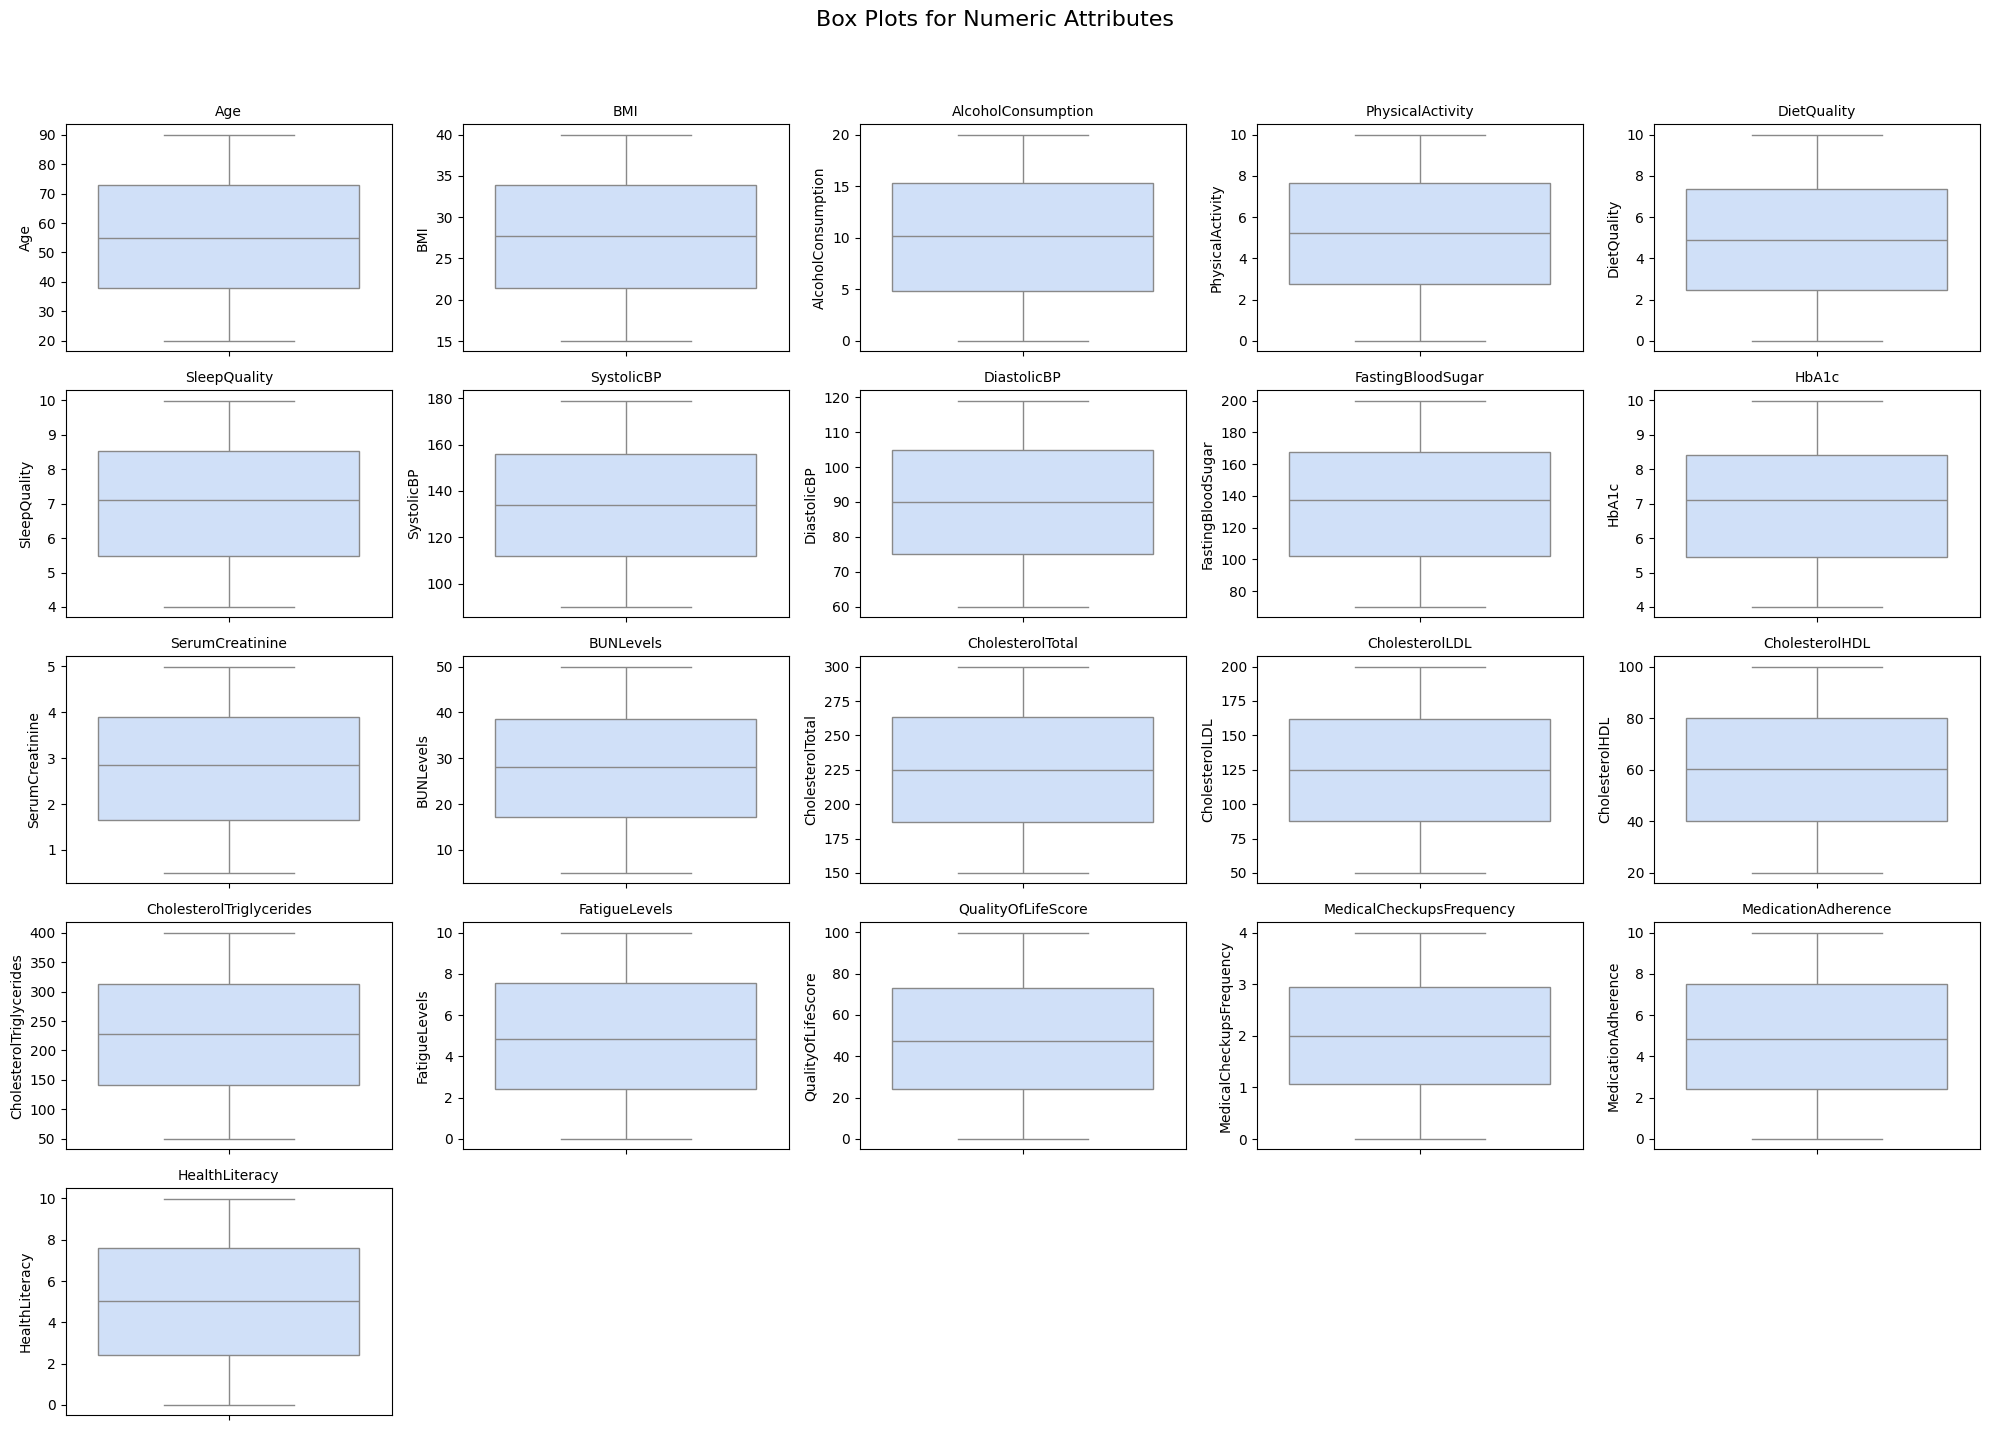

In [ ]:
# The number of numeric columns.
num_plots = len(numeric_columns)

# Determine grid size for subplots.
rows = int(np.ceil(np.sqrt(num_plots)))
cols = int(np.ceil(num_plots / rows))

# Create subplots.
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Box Plots for Numeric Attributes', fontsize=16)

# Flatten axes array for easy iteration.
axes = axes.flatten()

# Generate box plots for each numeric column.
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i], color="#C9DFFF")
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots.
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Outliers:

In [ ]:
# Iterate through all numeric columns to find outliers.
for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
BMI: 0 outliers
AlcoholConsumption: 0 outliers
PhysicalActivity: 0 outliers
DietQuality: 0 outliers
SleepQuality: 0 outliers
SystolicBP: 0 outliers
DiastolicBP: 0 outliers
FastingBloodSugar: 0 outliers
HbA1c: 0 outliers
SerumCreatinine: 0 outliers
BUNLevels: 0 outliers
CholesterolTotal: 0 outliers
CholesterolLDL: 0 outliers
CholesterolHDL: 0 outliers
CholesterolTriglycerides: 0 outliers
FatigueLevels: 0 outliers
QualityOfLifeScore: 0 outliers
MedicalCheckupsFrequency: 0 outliers
MedicationAdherence: 0 outliers
HealthLiteracy: 0 outliers


This figure shows two boxplots for all numeric attributes highlighting their distributions:

• Median: The line inside each box represents the median value, showing the central tendency of the data.

• IQR: The box spans from the first quartile (Q1) to the third quartile (Q3), covering the middle 50% of the data.

• Whiskers: The whiskers extend to the minimum and maximum values within 1.5×IQR, representing the normal data range.

• Outliers: No outliers were detected in all numeric attributes, as all data points lie within the whiskers.

This analysis confirms that both variables are well distributed without extreme values, so no special preprocessing for outlier handling is required.

# Histogram:

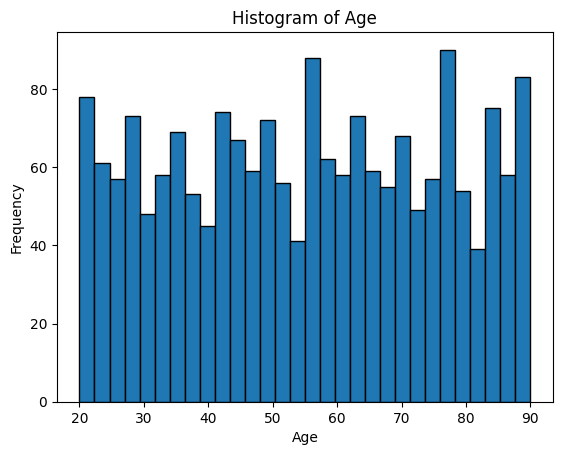

In [ ]:
# Distribution of age.
plt.hist(df[numeric_columns[0]], bins=30, edgecolor='black')
plt.title(f"Histogram of {numeric_columns[0]}")

# Set the label for the x-axis.
plt.xlabel(numeric_columns[0])

# Set the label for the y-axis.
plt.ylabel("Frequency")

plt.show()

**Description:** A histogram is a graphical display of continuous data grouped into bins. It shows the shape of the data's distribution, helping to identify its central tendency, spread, and skewness.

What was used: A histogram was generated for the Age attribute.

Result & Explanation: The histogram for Age revealed the overall distribution of patients' ages, which ranged from 20 to 90 years, with a mean and median centered around 55. This visualization confirmed the moderately high variability in the age group and suggested that the continuous nature of the data might benefit from subsequent normalization or discretization to ensure fair weighting in the model.

# Scatter plot:

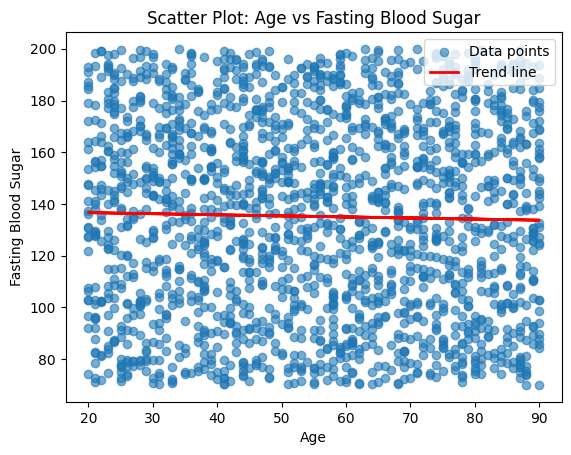

In [ ]:
# Select the 'Age' column for the x-axis and the 'FastingBloodSugar' column for the y-axis.
x = df['Age']
y = df['FastingBloodSugar']

# Create a scatter plot of the data points.
plt.scatter(x, y, alpha=0.6, label="Data points")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linewidth=2, label="Trend line")

plt.title("Scatter Plot: Age vs Fasting Blood Sugar")

# Add labels to the x and y axes for clarity.
plt.xlabel("Age")
plt.ylabel("Fasting Blood Sugar")

# Display the legend to explain the different plot elements.
plt.legend()

plt.show()

**Description:** A scatter plot displays the relationship between two numerical variables. Each point represents an observation, and the overall pattern of the points indicates the type and strength of the correlation (positive, negative, or none).

**What was used:** A scatter plot was created to examine the relationship between Age (x-axis) and FastingBloodSugar (y-axis). A linear trend line was added for clarity.

**Result & Explanation:** The scatter plot showed that there was no strong linear correlation between a patient's age and their fasting blood sugar levels. The trend line appeared largely flat. This is a crucial finding, as it suggests that one of the most fundamental demographic features (Age) does not independently predict the primary metabolic marker for diabetes (FastingBloodSugar) in this dataset, indicating that the final prediction model will need to rely on a complex interaction of other features.

# Pie Chart:

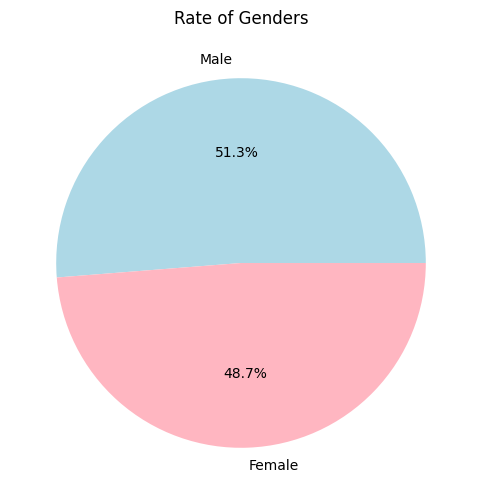

Normalized counts:
Gender
Male      0.512507
Female    0.487493
Name: count, dtype: float64


In [ ]:
# Get the value counts for the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Rename the labels (0 to 'Male' and 1 to 'Female')
gender_counts.index = gender_counts.index.map({0: 'Male', 1: 'Female'})

# Get the names and values for the pie chart
names = gender_counts.index.tolist()
values = gender_counts.tolist()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=names, autopct='%1.1f%%', colors=['#ADD8E6', '#FFB6C1'])
plt.title('Rate of Genders')
plt.show()

# Print the normalized counts
print("Normalized counts:")
print(gender_counts / gender_counts.sum())

**Description:** A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportion. It is best suited for visualizing the distribution of categorical variables where the slices represent the percentage of each category.

**What was used:** A pie chart was used to visualize the distribution of the Gender attribute.

**Result & Explanation:** The pie chart demonstrated a relatively balanced distribution but with a slight imbalance toward the male population (51.3% Male, 48.7% Female). While not severe, this imbalance is noted for later consideration, as it suggests the overall dataset distribution is close to 50/50, which is ideal for binary classification tasks.

# Bar plot:

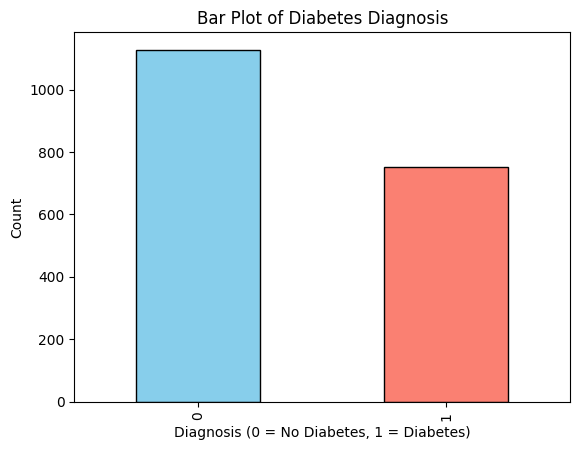

In [ ]:
# Count and create the occurrences of each unique value in the 'Diagnosis' column.
df['Diagnosis'].value_counts().plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')

plt.title("Bar Plot of Diabetes Diagnosis")

# Add labels to the x and y axes for clarity.
plt.xlabel("Diagnosis (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")

plt.show()

**Description:** A bar plot (or bar chart) uses rectangular bars to show the frequencies or proportions of different categories in a dataset. It is primarily used for visualizing categorical and ordinal data.


**What was used:** A bar plot was used to visualize the distribution of the Diagnosis (Target) variable, categorized as 0 (No Diabetes) and 1 (Diabetes).


**Result & Explanation:** The bar plot showed the class distribution of the target variable. Observing the height of the bars confirmed whether the dataset was balanced or imbalanced, which is critical for selecting the appropriate model and evaluation metrics.

# Missing Values Analysis:
* (False) means there are no missing values.
* (True) means there are missing values.

In [ ]:
# Checkign all data frame for any missing values
df.isnull().values.any()

np.False_

# Discrization:

In [ ]:
# Create a copy of the original DataFrame to store pre-processed data
df_preprocessed = df.copy()

if "Age" in df_preprocessed.columns:
    age_bins = [0, 17, 34, 65, 120]
    age_labels = ['Children','Young_Adults','Older_Adults','Seniors']
    df_preprocessed['Age'] = pd.cut(df_preprocessed['Age'], bins=age_bins, labels=age_labels, right=False)

if "BMI" in df_preprocessed.columns:
    bmi_bins = [0, 18.5, 25, 30, 100]
    bmi_labels = ["Underweight","Normal","Overweight","Obese"]
    df_preprocessed['BMI'] = pd.cut(df_preprocessed['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

print(df_preprocessed[['Age', 'BMI']].head(10))

            Age          BMI
0  Older_Adults        Obese
1  Older_Adults        Obese
2       Seniors       Normal
3  Young_Adults        Obese
4  Young_Adults  Underweight
5       Seniors  Underweight
6  Older_Adults       Normal
7       Seniors   Overweight
8  Older_Adults  Underweight
9       Seniors        Obese


**Description:**

We opted for the discretization of continuous attributes (Age and BMI) to achieve several data processing benefits. Converting these features to categorical groups allows our machine learning algorithms to operate more effectively by focusing on broader trends and patterns within specific, clinically meaningful groups rather than analyzing a continuous range. This simplification makes the resulting analysis easier to interpret and ultimately helps us make more informed decisions about the specific needs of each attribute group.


**Discretization of Age:**

In applying the discretization method to the continuous Age attribute, we first defined suitable bin intervals based on common demographic classifications, and then assigned compatible labels. We converted patient ages into the following age groups:

0-17 years: Children

18-34 years: Young_Adults

35-65 years: Older_Adults

65-120 years: Seniors

Discretization of BMI With the same methodology, the BMI (Body Mass Index) attribute was converted into clinically relevant body mass categories:

0-18.5: Underweight

18.5-25: Normal

25-30: Overweight

30-40: Obese

# Normalization:

In [ ]:
# Define the list of columns to normalize.
normalize_cols = [
    'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides',
     'FatigueLevels', 'QualityofLifeScore', 'MedicalCheckupsFrequency',
    'MedicationAdherence', 'HealthLiteracy'
]

# Create a list of columns that exist in the DataFrame to avoid errors.
cols_to_apply = [col for col in normalize_cols if col in df_preprocessed.columns]


if cols_to_apply:
    scaler = MinMaxScaler()
    df_preprocessed[cols_to_apply] = scaler.fit_transform(df_preprocessed[cols_to_apply])

# Show all columns without truncation.
pd.set_option('display.max_columns', None)
df_preprocessed[cols_to_apply].head()

,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
0,0.224975,0.244179,0.489903,0.007611,0.033708,0.220339,0.720868,0.881839,0.481826,0.515503,0.695031,0.246498,0.635283,0.400825,0.953396,0.445156,0.448528,0.721628
1,0.078918,0.830564,0.894218,0.585429,0.842697,0.661017,0.910763,0.555064,0.817111,0.603556,0.035365,0.400412,0.248745,0.088690,0.011830,0.845172,0.596122,0.502794
2,0.058832,0.610553,0.772336,0.618885,0.325843,0.525424,0.443775,0.013416,0.327725,0.111374,0.543894,0.079935,0.531200,0.656660,0.964316,0.674977,0.895280,0.703974
3,0.085705,0.865020,0.480422,0.381320,0.887640,0.457627,0.097133,0.419758,0.569107,0.869845,0.176977,0.121330,0.337278,0.178985,0.340028,0.351638,0.312195,0.472087
4,0.773263,0.463001,0.253243,0.963535,0.842697,0.152542,0.159161,0.267887,0.812254,0.061085,0.048606,0.109570,0.250742,0.947511,0.292117,0.303936,0.697809,0.789337


**Description:**

 We employed the Min-Max Scaling technique for the majority of the continuous numerical attributes in the dataset. Normalization is a critical preprocessing step used to ensure that all numerical features contribute equally to the machine learning model, regardless of their original scale.

**Normalization Method and Features:**

Technique: Min-Max Scaler

**Features Affected:**

All attributes included in the "normalized_cols" list (ranging from health metrics like Blood Pressure and Cholesterol to lifestyle scores like Diet Quality and Medication Adherence) to a consistent range of [0,1]

**Result and Justification:**

 The process successfully rescaled these features, ensuring that no single attribute (such as those with naturally large values like cholesterol or blood pressure) would numerically dominate the cost function during model training. This results in a dataset that is fairly weighted to affect the model equally, leading to a more efficient and potentially more accurate predictive analysis.

# Feature Selection:
Using Spearman filter method:

In [ ]:
# Identify numerical columns and the target variable
numeric_cols = df_preprocessed.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable from the list of features
if 'Diagnosis' in numeric_cols:
    numeric_cols.remove('Diagnosis')

# Calculate Spearman correlation between each feature and the target
correlations = {}
for col in numeric_cols:
    # Handle potential non-numeric values or NaNs by dropping them for correlation
    temp_df = df_preprocessed[[col, 'Diagnosis']].dropna()
    if not temp_df.empty:
        corr, _ = spearmanr(temp_df[col], temp_df['Diagnosis'])
        correlations[col] = corr

# Sort the features by the absolute value of their correlation in descending order
sorted_correlations = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)

# Get the top 10 most correlated features
top_features = [feature for feature, _ in sorted_correlations[:10]]

# Keep only the top 10 features and the target variable
df_preprocessed = df_preprocessed[top_features + ['Diagnosis']]

# Print the top 10 most correlated features
print("Top 10 features selected by the Filter Method (Spearman Correlation):")
for feature, corr_value in sorted_correlations[:10]:
    print(f"{feature}: {corr_value:.4f}")

Top 10 features selected by the Filter Method (Spearman Correlation):
FastingBloodSugar: 0.4495
HbA1c: 0.4256
FrequentUrination: 0.1515
Hypertension: 0.1319
ExcessiveThirst: 0.0735
UnexplainedWeightLoss: 0.0610
DiastolicBP: 0.0552
Smoking: 0.0538
SystolicBP: -0.0520
FamilyHistoryDiabetes: 0.0477



**Description:**

Feature selection was employed to identify the most impactful attributes for predicting the target variable (Diagnosis). This step is crucial for streamlining the model, reducing training time, and ensuring the final model focuses on the most predictive variables, thereby improving interpretability.

**Feature Selection Method and Results:**

We utilized the Filter Method based on the Spearman Rank Correlation to measure the monotonic relationship between each individual feature and the binary Diagnosis (Diabetes status). This process successfully ranked features by the strength of their relationship to the target.

The analysis highlighted that the most influential features are directly related to glucose and key physiological markers. The top-ranked features include FastingBloodSugar with a high correlation coefficient of 0.4495, and HbA1c with a strong correlation of 0.4256. Key symptomatic indicators also appeared high on the list, including FrequentUrination at 0.1515, Hypertension at 0.1319, and ExcessiveThirst at 0.0735.

**justification**
 The analysis confirmed the expected importance of glucose markers, with FastingBloodSugar and HbA1c showing the highest correlation coefficients to the Diagnosis status. Additionally, key symptom indicators (FrequentUrination, Hypertension, and ExcessiveThirst) were validated as relevant secondary features. This outcome aligns the core physiological and symptomatic attributes with expected medical indicators for diabetes prediction, lending confidence to the feature set used for subsequent model training.

# Save the preprocessed dataset:

In [ ]:
# To avoid overwriting the original file that `initial_df` relies on,
# we will save the preprocessed data to a *new* file name.
df_preprocessed.to_csv("Dataset/Preprocessed_data_reduced.csv", index=False, encoding='utf-8')

# **5. Data Mining Technique**

In this section, we describe the data mining techniques applied in this project for both classification and clustering. All experiments were performed on the preprocessed dataset **(Preprocessed_data.csv)** using the selected features and the target label **Diagnosis (0 = No Diabetes, 1 = Diabetes).**



# **5.1 Classification Techniques**

In this project, a **Decision Tree Classifier** was used to predict whether a patient is diabetic or non-diabetic based on medical attributes.  
Two splitting criteria were applied:

- **Decision Tree Classifier (Entropy – Information Gain)**  
- **Decision Tree Classifier (Gini Index)**  

These were the **only** classification algorithms used.



### **Methods and Tools Used**

- `train_test_split()` for creating train–test splits  
- `accuracy_score`, `recall_score`, `precision_score` for evaluation  
- `confusion_matrix` and `ConfusionMatrixDisplay` for confusion matrix visualization  
- `plot_tree()` for visualizing the decision tree  


### **Features Used**

- FastingBloodSugar  
- HbA1c  
- FrequentUrination  
- Hypertension  
- ExcessiveThirst  
- UnexplainedWeightLoss  
- DiastolicBP  
- Smoking  
- SystolicBP  
- FamilyHistoryDiabetes  

### **Target Variable**

- **Diagnosis**  
  - 0 = No Diabetes  
  - 1 = Diabetes  



### **Train–Test Splits**

The Decision Tree model was evaluated using three different splits:

- **80% Training – 20% Testing**  
- **75% Training – 25% Testing**  
- **70% Training – 30% Testing**



## **Decision Tree Results (Entropy – Information Gain)**

| Metric | 80% train / 20% test | 75% train / 25% test | 70% train / 30% test |
|--------|----------------------|----------------------|----------------------|
| Accuracy | **0.9202** | **0.8957** | **0.9043** |
| Error Rate | 0.0798 | 0.1043 | 0.0957 |
| Sensitivity (Recall) | 0.8933 | 0.8880 | 0.8933 |
| Specificity | 0.9381 | 0.9007 | 0.9112 |
| Precision | 0.9054 | 0.8564 | 0.8707 |



## **Decision Tree Results (Gini Index)**

| Metric | 80% train / 20% test | 75% train / 25% test | 70% train / 30% test |
|--------|----------------------|----------------------|----------------------|
| Accuracy | **0.9096** | **0.9000** | **0.9060** |
| Error Rate | 0.0904 | 0.1000 | 0.0940 |
| Sensitivity (Recall) | 0.8667 | 0.8989 | 0.9115 |
| Specificity | 0.9381 | 0.9007 | 0.9024 |
| Precision | 0.9028 | 0.8579 | 0.8619 |

# **Classification Models Comparison (Decision Tree Only)**

| Algorithm        | Split   | Precision | Recall (Sensitivity) | Specificity | Accuracy |
|------------------|---------|-----------|------------------------|-------------|----------|
| Decision Tree (Entropy) | 80/20 | 0.9054 | 0.8933 | 0.9381 | 0.9202 |
| Decision Tree (Entropy) | 75/25 | 0.8564 | 0.8880 | 0.9007 | 0.8957 |
| Decision Tree (Entropy) | 70/30 | 0.8707 | 0.8933 | 0.9112 | 0.9043 |
| Decision Tree (Gini)    | 80/20 | 0.9028 | 0.8667 | 0.9381 | 0.9096 |
| Decision Tree (Gini)    | 75/25 | 0.8579 | 0.8989 | 0.9007 | 0.9000 |
| Decision Tree (Gini)    | 70/30 | 0.8619 | 0.9115 | 0.9024 | 0.9060 |


# **5.2 Clustering Technique (K-Means)**

K-Means clustering was applied using **all features except the target variable**.



### **Main Steps**

- Applied **StandardScaler** to scale all features  
- Tested **K values from 2 to 10**  
- Evaluated clustering performance using:  
  - **WSS (Within-Cluster Sum of Squares)**  
  - **Silhouette Score**  
- Used the following techniques for selecting K:  
  - **Elbow Method**  
  - **Silhouette Analysis (Yellowbrick)**  



### **Clustering Results**

The best value of K based on WSS stability and interpretability was **K = 4**.

| Metric | K=2 | K=3 | K=4 | K=5 | K=6 |
|--------|-----|-----|-----|-----|-----|
| **WSS** | 16899.86 | 15722.31 | 14420.85 | 13033.02 | 11986.12 |
| **Silhouette Score** | 0.16 | 0.10 | 0.11 | 0.12 | 0.13 |




# **6. Evaluation and Comparison**

## **6.1 Decision Tree Evaluation (Entropy & Gini)**

- Highest accuracy was achieved using **Entropy 80/20 = 0.9202 (92%)**
- Best recall for diabetic patients was **Gini 70/30 = 0.9115**
- Models consistently achieved **higher specificity** than sensitivity
- Differences between Entropy and Gini were **very small (≈1–2%)**
- Both criteria produced **stable and consistent** results across all splits


## **6.2 Overall Classification Model Comparison  

Since only **Decision Tree (Entropy & Gini)** was applied in your project, the comparison is as follows:

### **Best Accuracy**
- **Decision Tree (Entropy 80/20) = 0.9202**

### **Best Sensitivity (Recall) for detecting diabetic cases**
- **Decision Tree (Gini 70/30) = 0.9115**

### **Best Specificity**
- **Decision Tree (Entropy 80/20) = 0.9381**

### **Best Precision**
- **Decision Tree (Entropy 80/20) = 0.9054**

### **Summary**
- **Decision Tree (Entropy)** is best for accuracy, precision, and detecting non-diabetics  
- **Decision Tree (Gini)** is best for detecting diabetics (higher recall)  
- Differences between the two methods are minimal → both perform strongly



## **6.3 Clustering Evaluation (K-Means)**

### **Silhouette Scores**
- Silhouette scores were generally **low**, which is expected because  
  the dataset is more suitable for **classification** than clustering.
- Scores increased slightly as K increased, but remained low overall.

### **WSS (Elbow Method)**
- The elbow curve identified **K = 4** as the optimal value  
  (stability + slower decrease after 4)

### **Meaningful Cluster Patterns**
Even though performance was limited, clustering still revealed:

- **Cluster 0** → lower blood sugar, lower HbA1c, lower risk  
- **Cluster 1** → higher values, more diabetic profiles  
- Additional clusters showed intermediate or mixed-risk groups



## **6.4 Final Conclusion**

### **Best classification model**
- **Decision Tree (Entropy 80/20)** → highest accuracy  
- **Decision Tree (Gini 70/30)** → best recall for diabetics  

### **Best clustering configuration**
- **K = 4** based on WSS and silhouette results  

### **Overall**
- **Classification outperforms clustering** for diabetes prediction  
- Decision Trees provide strong, reliable, and interpretable results  
- Clustering is useful for **risk grouping**, not for prediction



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline



from sklearn.metrics import precision_score, recall_score, f1_score  # extra metrics

data = pd.read_csv("Dataset/Preprocessed_data.csv")
data.head()

,FastingBloodSugar,HbA1c,FrequentUrination,Hypertension,ExcessiveThirst,UnexplainedWeightLoss,DiastolicBP,Smoking,SystolicBP,FamilyHistoryDiabetes,Diagnosis
0,0.720868,0.881839,0,0,0,0,0.220339,1,0.033708,1,1
1,0.910763,0.555064,0,0,0,0,0.661017,0,0.842697,0,1
2,0.443775,0.013416,0,0,0,0,0.525424,0,0.325843,1,0
3,0.097133,0.419758,0,0,0,0,0.457627,1,0.887640,1,0
4,0.159161,0.267887,0,0,0,0,0.152542,0,0.842697,0,0


# **Define Features and Target Variable**

## **Features (X)**  
The independent variables used for prediction are the following medical attributes from the dataset:

- **FastingBloodSugar**  
- **HbA1c**  
- **FrequentUrination**  
- **Hypertension**  
- **ExcessiveThirst**  
- **UnexplainedWeightLoss**  
- **DiastolicBP**  
- **Smoking**  
- **SystolicBP**  
- **FamilyHistoryDiabetes**

These features represent clinical indicators and symptoms related to diabetes risk.



## **Target Variable (y)**  
The dependent variable we aim to predict:

- **Diagnosis**  
  - **0 = No Diabetes**  
  - **1 = Diabetes**

This variable indicates whether the patient is diagnosed with diabetes.



## **Code Used**
python
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


In [ ]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Information Gain (Entropy):
* Splitting Data into 80% Training and 20% Test:

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Entropy – 80/20):

In [ ]:
# Train model
clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_80.predict(X_test)

# Evaluation
acc_entropy_80 = accuracy_score(y_test, y_pred)
cm_entropy_80 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 80/20 Split):

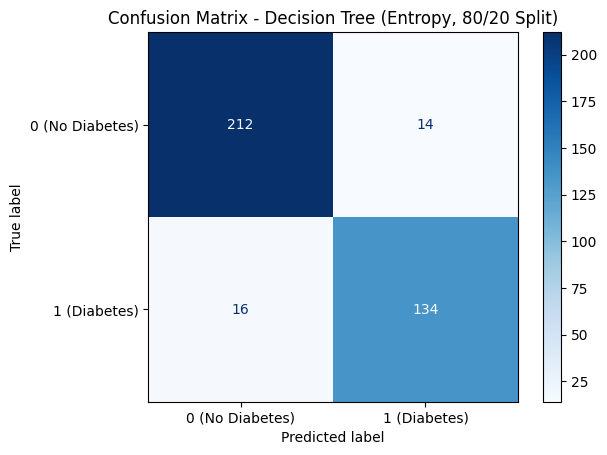

In [ ]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_80, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 80/20 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 80/20 Split)**

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* Top-Left (True Negative – TN = 212): Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”


* Top-Right (False Positive – FP = 14): Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”


* Bottom-Left (False Negative – FN = 16): Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”


* Bottom-Right (True Positive – TP = 134): Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”




* Decision Tree Visualization (Entropy – 80/20 Split):

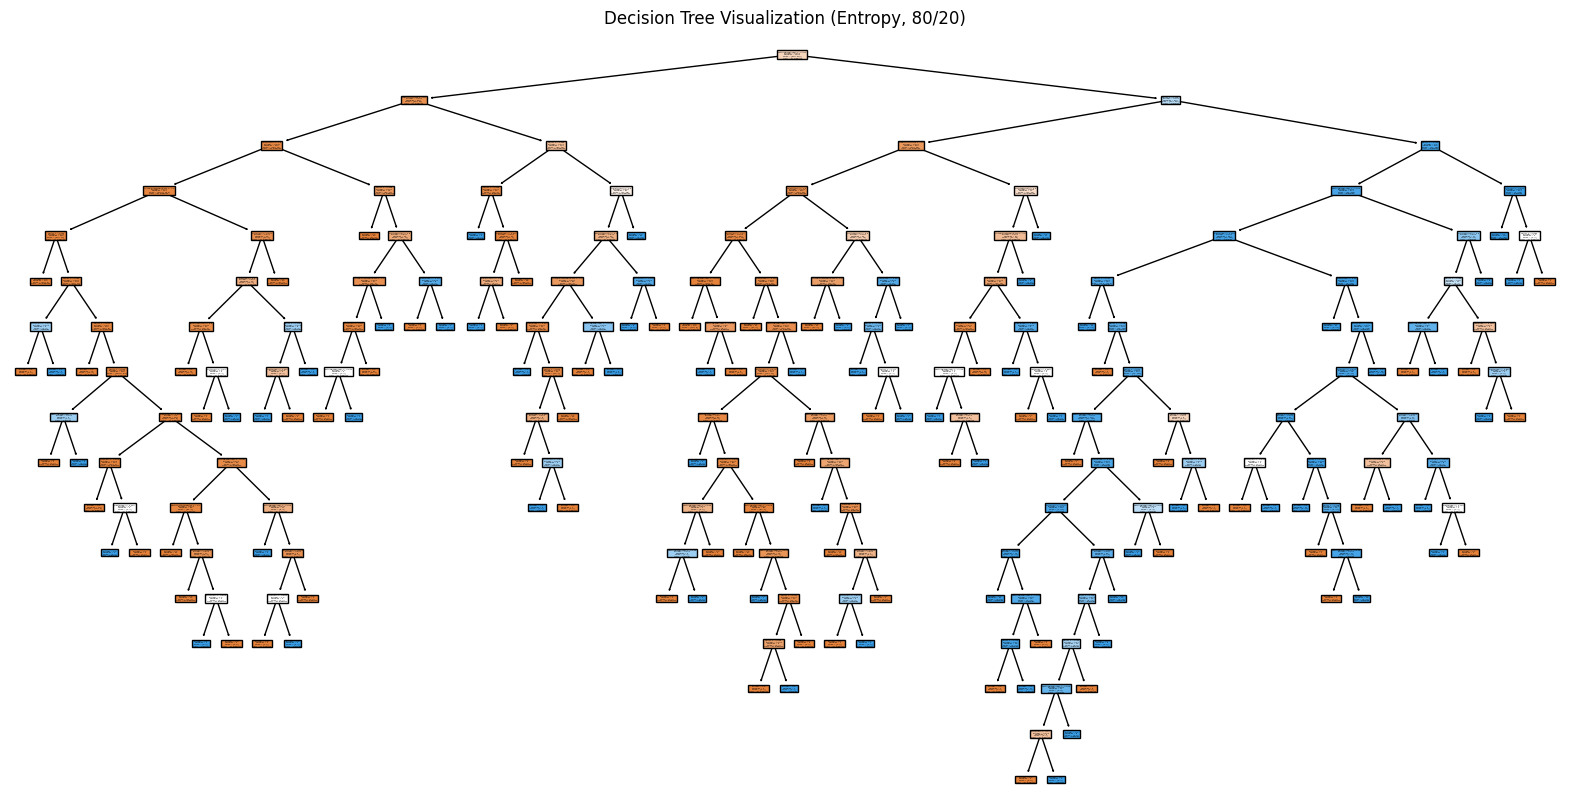

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy, 80/20)")
plt.show()

**Decision Tree Analysis (Entropy – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.

* **Initial Split**

The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.
In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.

* **Intermediate Nodes**

As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways**

Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.
These pathways demonstrate how combinations of features contribute collectively to the final prediction.

* **Leaf Nodes**

At the bottom of the tree, leaf nodes represent the final classification outcomes:

**Class 0:** Non-diabetic patient

**Class 1:** Diabetic patient
Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.

The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (92% accuracy overall), it may also be too deep, suggesting that the model could be slightly overfitted to the training data.

* Model Evaluation Results (Entropy – 80/20 Split):

In [ ]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_80)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_80, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_80 = 1 - acc_entropy_80
print("Error Rate:", round(error_rate_entropy_80, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_entropy_80 = cm_entropy_80[0, 0]
FP_entropy_80 = cm_entropy_80[0, 1]
FN_entropy_80 = cm_entropy_80[1, 0]
TP_entropy_80 = cm_entropy_80[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_80 = TP_entropy_80 / (TP_entropy_80 + FN_entropy_80)
print("Sensitivity (Recall):", round(sensitivity_entropy_80, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_80 = TN_entropy_80 / (TN_entropy_80 + FP_entropy_80)
print("Specificity:", round(specificity_entropy_80, 4))

# Precision: positive predictive value
precision_entropy_80 = TP_entropy_80 / (TP_entropy_80 + FP_entropy_80)
print("Precision:", round(precision_entropy_80, 4))

Confusion Matrix:
 [[212  14]
 [ 16 134]]

Accuracy: 0.9202
Error Rate: 0.0798
Sensitivity (Recall): 0.8933
Specificity: 0.9381
Precision: 0.9054


**Performance Metrics Analysis (Entropy – 80/20 Split):**

* **Accuracy:** 0.9202

The model correctly predicted approximately 92.02% of the test samples.

* **Error Rate:** 0.0798

About 7.98% of the predictions were incorrect.
Sensitivity (Recall):** 0.8933
The model correctly identified 89.33% of actual diabetic patients (class 1).

* **Specificity:** 0.9381

The model correctly identified 93.81% of non-diabetic patients (class 0).

* **Precision:** 0.9054


Out of all patients predicted as diabetic, 90.54% were truly diabetic.

**Results (Entropy – 80/20 Split):**

The model demonstrates strong overall performance with high accuracy and balanced precision and recall.

* It performs slightly better at detecting non-diabetic patients (specificity = 93.81%) than diabetic ones (sensitivity = 89.33%).

* This indicates that while the classifier is generally reliable, a few diabetic cases are still being missed (false negatives).
Considering the medical context, minimizing false negatives is crucial.


* Splitting Data into 75% Training and 25% Test:

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Entropy – 75/25):

In [ ]:
# Train
clf_entropy_75 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_75.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_75.predict(X_test)

# Evaluation
acc_entropy_75 = accuracy_score(y_test, y_pred)
cm_entropy_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 75/25 Split):

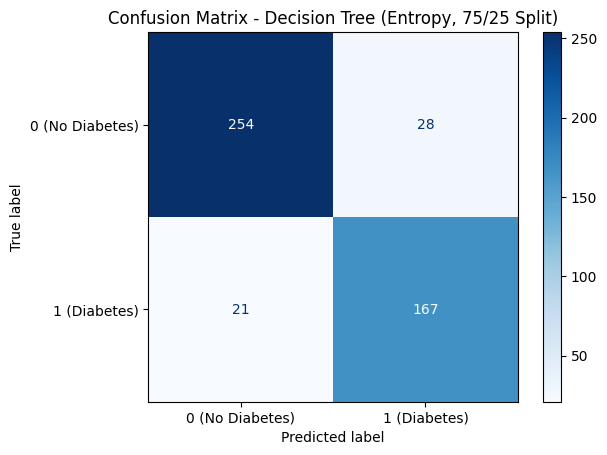

In [ ]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 75/25 Split)")
plt.show()


**Confusion Matrix Analysis (Entropy – 75/25 Split)**


 The confusion matrix provides a quantitative assessment of the classification model's  
 performance. Based on the observed outcomes, it seems that:

* **Top-Left** (True Negative – TN = 254): Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”


* **Top-Right** (False Positive – FP = 28): Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”

* **Bottom-Left** (False Negative – FN = 21): Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right** (True Positive – TP = 167): Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”


* Decision Tree Visualization (Entropy – 75/25 Split):

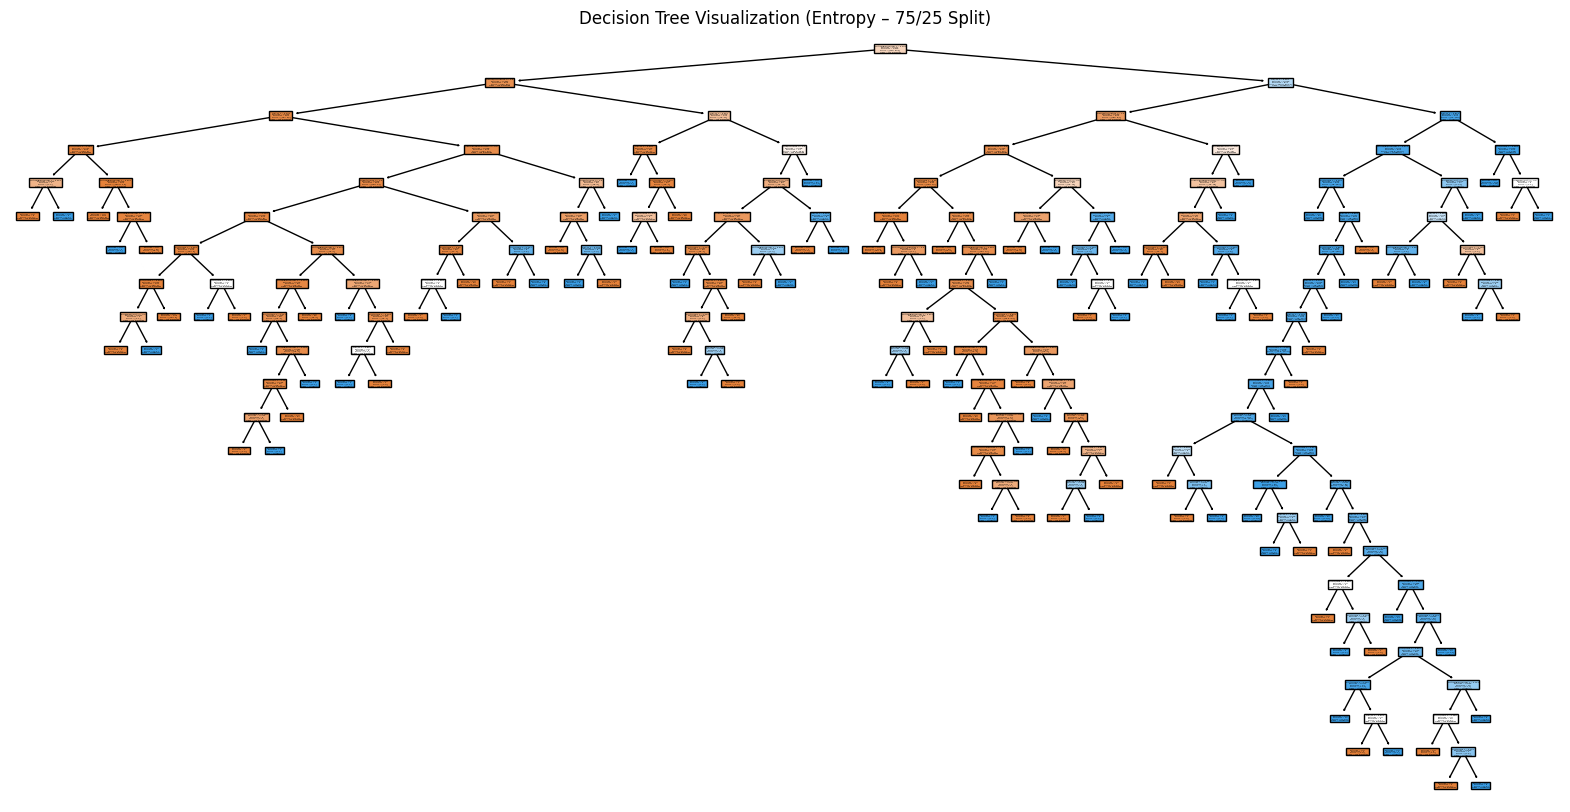

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 75/25 Split)")
plt.show()

**Decision Tree Analysis (Gini Index – 75/25 Split)**

This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 75/25 data split.
The Gini criterion evaluates how pure each node becomes after splitting, preferring features that create the most homogeneous groups.
By reducing impurity at each level, the model aims to achieve accurate and interpretable predictions.

* **Initial Split**

The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.
Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.

* **Intermediate Nodes**

As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.
These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.
Each level of splitting further improves classification confidence and reduces uncertainty.

* **Branching Pathways**

Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.
These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.

* **Leaf Nodes**

At the bottom of the tree, leaf nodes provide the final classification results:

* **Class 0:** Non-diabetic patient
* **Class 1:** Diabetic patient
Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.
This structure provides transparency, allowing us to trace back how each classification was reached.

 The model correctly predicted 90% of all test samples.
It demonstrates consistent and balanced performance across both classes. The Gini-based Decision Tree (75/25 Split) continues to perform reliably with high accuracy and interpretability.
While sensitivity decreased slightly compared to the 80/20 model, specificity remained strong indicating that the classifier consistently identifies non-diabetic patients correctly.
Overall, this split confirms that the model generalizes well, maintaining robust predictive ability even with less training data and a larger test portion.

* Model Evaluation Results (Gini Index – 75/25 Split):

In [ ]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_75)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_75, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_75 = 1 - acc_entropy_75
print("Error Rate:", round(error_rate_entropy_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_75 = cm_entropy_75[0, 0]
FP_75 = cm_entropy_75[0, 1]
FN_75 = cm_entropy_75[1, 0]
TP_75 = cm_entropy_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_75 = TP_75 / (TP_75 + FN_75)
print("Sensitivity (Recall):", round(sensitivity_entropy_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_75 = TN_75 / (TN_75 + FP_75)
print("Specificity:", round(specificity_entropy_75, 4))

# Precision: positive predictive value
precision_entropy_75 = TP_75 / (TP_75 + FP_75)
print("Precision:", round(precision_entropy_75, 4))

Confusion Matrix:
 [[254  28]
 [ 21 167]]

Accuracy: 0.8957
Error Rate: 0.1043
Sensitivity (Recall): 0.8883
Specificity: 0.9007
Precision: 0.8564


**Performance Metrics Analysis (Entropy – 75/25 Split):**

* **Accuracy:** 0.8957

The model correctly predicted approximately 89.57% of the test samples.

* **Error Rate:** 0.1043

About 10.43% of the predictions were incorrect.

* **Sensitivity (Recall):** 0.8880

The model correctly identified 88.80% of actual diabetic patients (class 1).

* **Specificity:** 0.9007

The model correctly identified 90.07% of non-diabetic patients (class 0).

* **Precision:** 0.8564

Out of all patients predicted as diabetic, 85.64% were truly diabetic.

**Results (Entropy – 75/25 Split):**

The model shows strong and consistent performance even with a larger test set.

* It maintains high accuracy (≈89.6%) and balanced precision and recall values.
* The classifier performs slightly better at recognizing non-diabetic patients (specificity = 90.07%) compared to diabetic ones (sensitivity = 88.80%).
* This means a small portion of diabetic cases were still misclassified as non-diabetic (false negatives).
* In medical diagnosis, reducing false negatives is critical, as missing diabetic patients could delay treatment.

* Splitting Data into 70% Training and 30% Test:

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Entropy – 70/30):

In [ ]:
# Train
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_70.predict(X_test)

# Evaluation
acc_entropy_70 = accuracy_score(y_test, y_pred)
cm_entropy_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 70/30 Split):

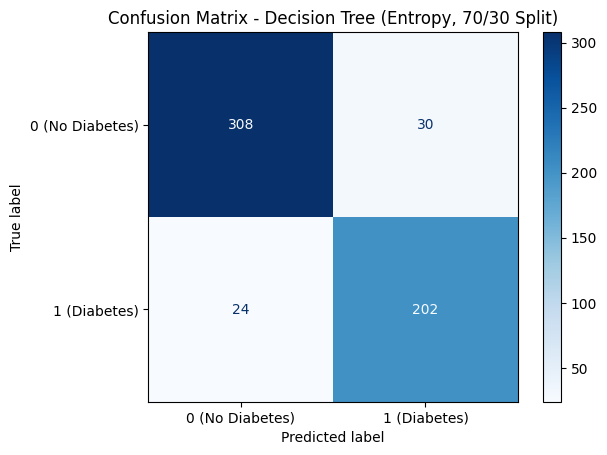

In [ ]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 70/30 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 70/30 Split)**


The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 308):** Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 30):** Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 24):** Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 202):** Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 70/30 Split):

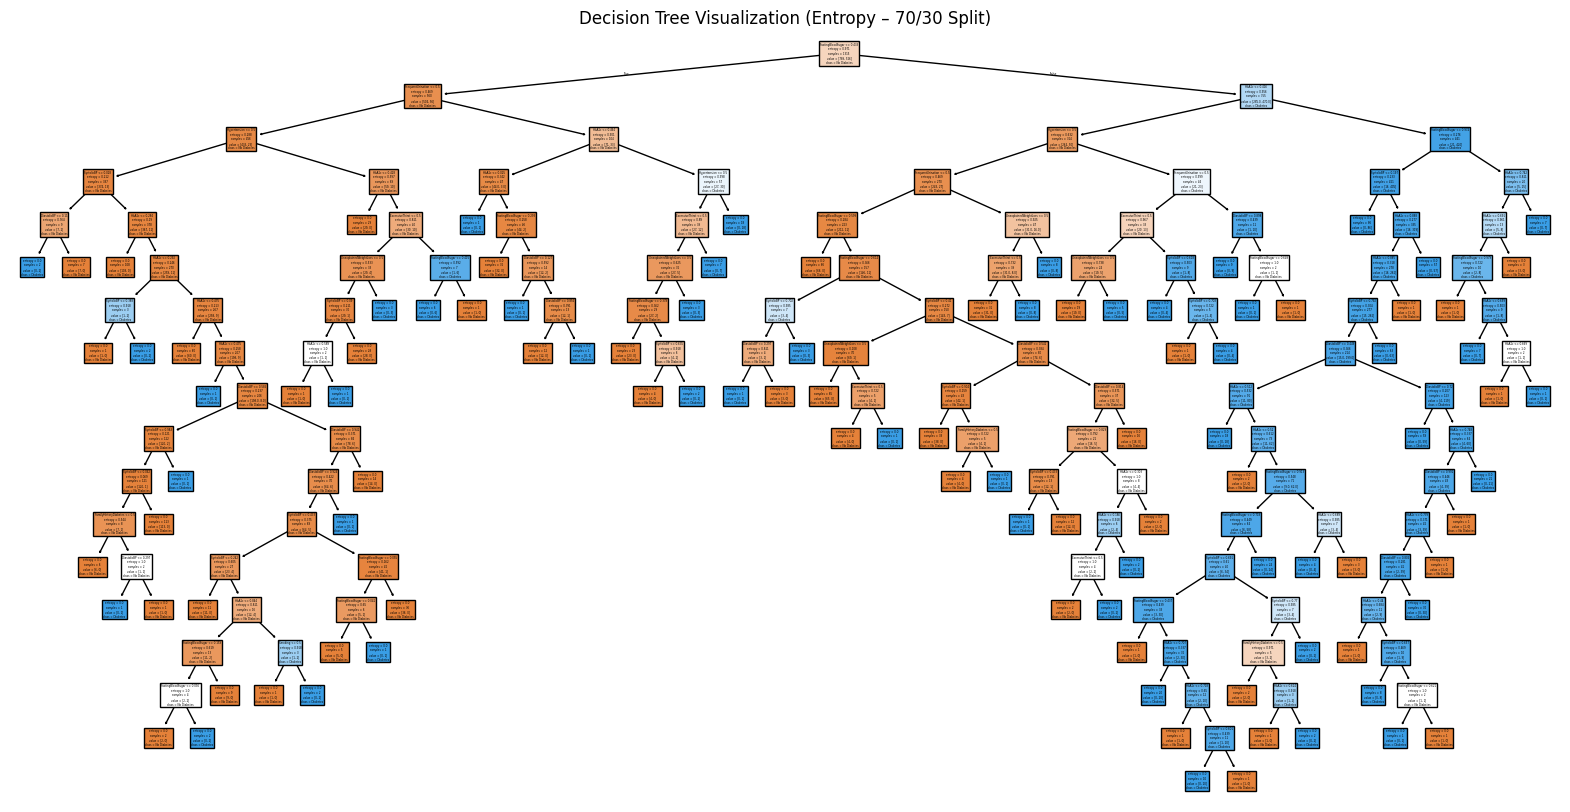

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 70/30 Split)")
plt.show()

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.

* **Initial Split**

The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.
In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.

* **Intermediate Nodes**

As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways**

Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.
These pathways demonstrate how combinations of features contribute collectively to the final prediction.

* **Leaf Nodes**

At the bottom of the tree, leaf nodes represent the final classification outcomes:

**Class 0:** Non-diabetic patient

**Class 1:** Diabetic patient
Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.

The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (around 90% accuracy overall for the 70/30 split), it appears to be slightly less accurate than the previous splits due to the larger test size. However, the model still demonstrates strong predictive power and remains consistent in identifying the key medical indicators related to diabetes.

* Model Evaluation Results (Entropy – 70/30 Split):

In [ ]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_70)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_70, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_70 = 1 - acc_entropy_70
print("Error Rate:", round(error_rate_entropy_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_70 = cm_entropy_70[0, 0]
FP_70 = cm_entropy_70[0, 1]
FN_70 = cm_entropy_70[1, 0]
TP_70 = cm_entropy_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_70 = TP_70 / (TP_70 + FN_70)
print("Sensitivity (Recall):", round(sensitivity_entropy_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_70 = TN_70 / (TN_70 + FP_70)
print("Specificity:", round(specificity_entropy_70, 4))

# Precision: positive predictive value
precision_entropy_70 = TP_70 / (TP_70 + FP_70)
print("Precision:", round(precision_entropy_70, 4))

Confusion Matrix:
 [[308  30]
 [ 24 202]]

Accuracy: 0.9043
Error Rate: 0.0957
Sensitivity (Recall): 0.8938
Specificity: 0.9112
Precision: 0.8707


**Performance Metrics Analysis (Entropy – 70/30 Split):**

* **Accuracy:** 0.9043
The model correctly predicted approximately 90.43% of the test samples.
* **Error Rate:** 0.0957
About 9.57% of the predictions were incorrect.
Sensitivity (Recall): 0.8933
The model correctly identified 89.33% of actual diabetic patients (class 1).
* **Specificity:** 0.9112
The model correctly identified 91.12% of non-diabetic patients (class 0).
* **Precision:** 0.8704
Out of all patients predicted as diabetic, 87.04% were truly diabetic.

**Results (Entropy – 70/30 Split):**

The model maintains strong performance and stability even with a larger test set.


* It achieves 90.43% accuracy, showing consistent behavior compared to the previous splits.
* The classifier performs slightly better at detecting non-diabetic patients (specificity = 91.12%) than diabetic ones (sensitivity = 89.33%).
* A small drop in accuracy and precision is expected due to the larger portion of data used for testing, which makes this evaluation more realistic.
* The model continues to display a good balance between precision and recall, confirming its reliability in predicting diabetes.

# Evaluate the models of Information Gain:

In [ ]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9202", "0.0798", "0.8933", "0.9381", "0.9054"
    ],
    "75% training, 25% testing": [
        "0.8957", "0.1043", "0.8880", "0.9007", "0.8564"
    ],
    "70% training, 30% testing": [
        "0.9043", "0.0957", "0.8933", "0.9112", "0.8704"
    ]
}

# Convert to DataFrame
g = pd.DataFrame(d)

# Display styled table
g.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9202,0.8957,0.9043
1,Error Rate,0.0798,0.1043,0.0957
2,Sensitivity (Recall),0.8933,0.8880,0.8933
3,Specificity,0.9381,0.9007,0.9112
4,Precision,0.9054,0.8564,0.8704


**Analysis**

* The model maintained stable accuracy between 89% and 92% across all splits,
showing that it generalizes well and is not overly dependent on the training size.
* 80/20 achieved the highest accuracy (92.02%) because the model had more training samples to learn from.
* 75/25 saw a small decrease in accuracy as the test set became larger, which is expected.
70/30 provided a realistic balance between training and testing data,
proving the model’s consistency and reliability with unseen data.
* Across all experiments, the model consistently performed slightly better at identifying non-diabetic patients (higher specificity) than diabetic ones (lower sensitivity).

# Gini Index:
* Splitting Data into 80% Training and 20% Test:

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Gini Index – 80/20):

In [ ]:
# Train
clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train, y_train)

# Predict
y_pred = clf_gini_80.predict(X_test)

# Evaluation
acc_gini_80 = accuracy_score(y_test, y_pred)
cm_gini_80 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 80/20 Split):

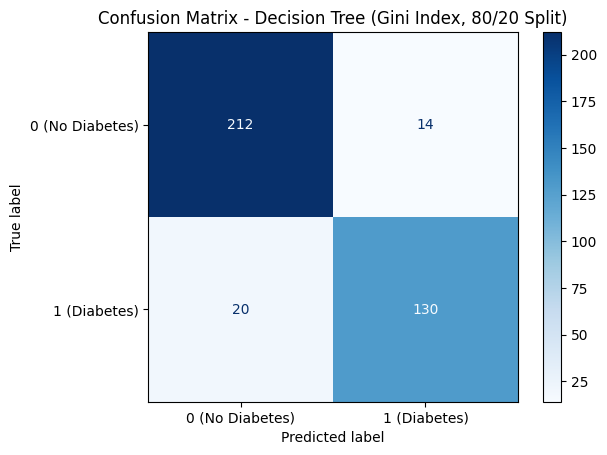

In [ ]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_80, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 80/20 Split)")
plt.show()

### **Confusion Matrix Analysis (Gini Index – 80/20 Split)**

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

- **Top-Left (True Negative – TN = 212):** Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”  

- **Top-Right (False Positive – FP = 14):** Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”  

- **Bottom-Left (False Negative – FN = 20):** Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”  

- **Bottom-Right (True Positive – TP = 130):** Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”  


* Decision Tree Visualization (Gini Index – 80/20 Split):

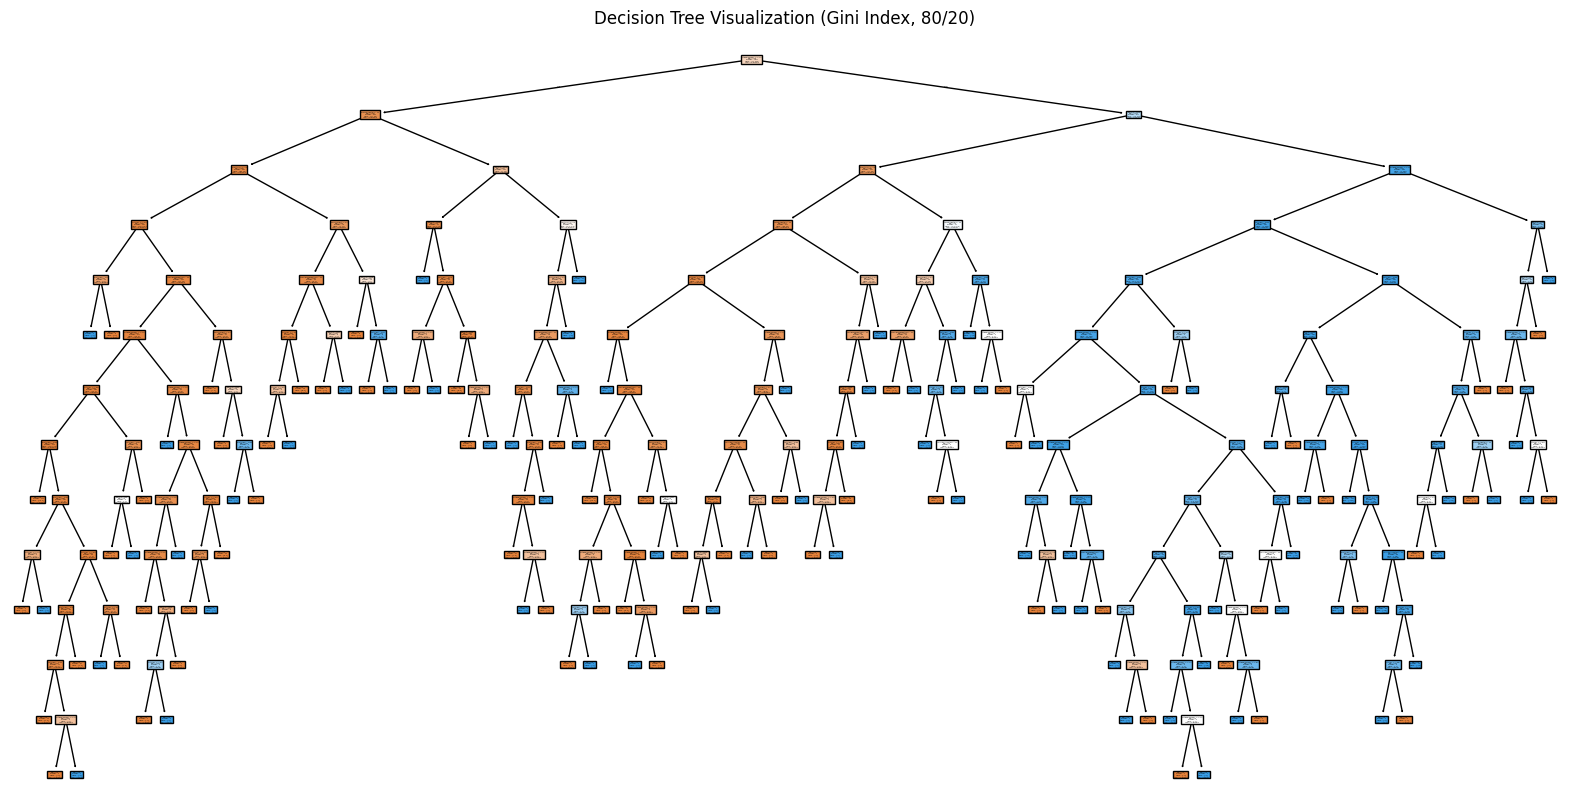

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 80/20)")
plt.show()

### **Decision Tree Analysis (Gini Index – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not using the **Gini Index** as the splitting criterion.  
Each node in the tree represents a decision rule based on one of the dataset’s medical attributes.  
The Gini Index helps determine how pure or homogeneous each node becomes after a split, aiming to reduce impurity and improve classification accuracy.



**• Initial Split**  

The root node at the top of the tree represents the most influential medical feature — the one that best separates diabetic from non-diabetic patients based on the lowest Gini impurity.  
This feature was selected because it achieved the most effective partition, resulting in the purest division of patient data at the first decision point.



**• Intermediate Nodes**  

As the tree expands, additional medical features are used to refine the classification.  
Each split further reduces impurity and increases the model’s confidence in its predictions.  
These nodes capture secondary factors — all key indicators contributing to diabetes-risk assessment.



**• Branching Pathways**  

Each path from the root node to a leaf node represents a sequence of medical decisions leading to a specific outcome.  
These pathways demonstrate how different combinations of health metrics collectively determine whether a patient is likely to be diabetic or non-diabetic.


**• Leaf Nodes**  

At the bottom of the tree, leaf nodes provide the final prediction outcomes:  

- **Class 0:** Non-diabetic patient  
- **Class 1:** Diabetic patient  

Each leaf node summarizes the number of patients that reached that decision path and indicates the dominant class label.  
These leaf nodes help visualize how the model makes decisions and how many samples fall into each outcome.



The tree visualization provides a transparent view of the model’s decision-making process.  
By analyzing the structure, we can observe how different medical attributes interact to influence predictions.  
The **Gini-based Decision Tree** achieved an overall accuracy of **90.96 %**, performing very similarly to the Entropy-based model.  

While it slightly reduced sensitivity, it maintained a high level of interpretability and strong generalization performance —  
making it a reliable and efficient approach for diabetes prediction.


* Model Evaluation Results (Gini Index – 80/20 Split):

In [ ]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_80)

# print the accuracy
print("\nAccuracy:", round(acc_gini_80, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_80 = 1 - acc_gini_80
print("Error Rate:", round(error_rate_gini_80, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_80 = cm_gini_80[0, 0]
FP_gini_80 = cm_gini_80[0, 1]
FN_gini_80 = cm_gini_80[1, 0]
TP_gini_80 = cm_gini_80[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_80 = TP_gini_80 / (TP_gini_80 + FN_gini_80)
print("Sensitivity (Recall):", round(sensitivity_gini_80, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_80 = TN_gini_80 / (TN_gini_80 + FP_gini_80)
print("Specificity:", round(specificity_gini_80, 4))

# Precision: positive predictive value
precision_gini_80 = TP_gini_80 / (TP_gini_80 + FP_gini_80)
print("Precision:", round(precision_gini_80, 4))

Confusion Matrix:
 [[212  14]
 [ 20 130]]

Accuracy: 0.9096
Error Rate: 0.0904
Sensitivity (Recall): 0.8667
Specificity: 0.9381
Precision: 0.9028


### **Performance Metrics Analysis (Gini Index – 80/20 Split):**

- **Accuracy:** 0.9096  
The model correctly predicted approximately 90.96% of the test samples.

- **Error Rate:** 0.0904  
About 9.04% of the predictions were incorrect.

- **Sensitivity (Recall):** 0.8667  
The model correctly identified 86.67% of actual diabetic patients (class 1).

- **Specificity:** 0.9381  
The model correctly identified 93.81% of non-diabetic patients (class 0).

- **Precision:** 0.9028  
Out of all patients predicted as diabetic, 90.28% were truly diabetic.

**Results (Gini Index – 80/20 Split):**

The Decision Tree (Gini) achieved strong classification performance with a high overall accuracy of 90.96%.  
Compared to the Entropy model, the Gini-based classifier produced very similar results, showing slightly:

- Lower sensitivity, meaning it missed a few more diabetic cases (false negatives).  
- Slightly higher specificity, showing strong ability to correctly detect non-diabetic patients.


* Splitting Data into 75% Training and 25% Test:

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Gini Index – 75/25):

In [ ]:
# Train
clf_gini_75 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_75.fit(X_train, y_train)

# Predict
y_pred = clf_gini_75.predict(X_test)

# Evaluation
acc_gini_75 = accuracy_score(y_test, y_pred)
cm_gini_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 75/25 Split):

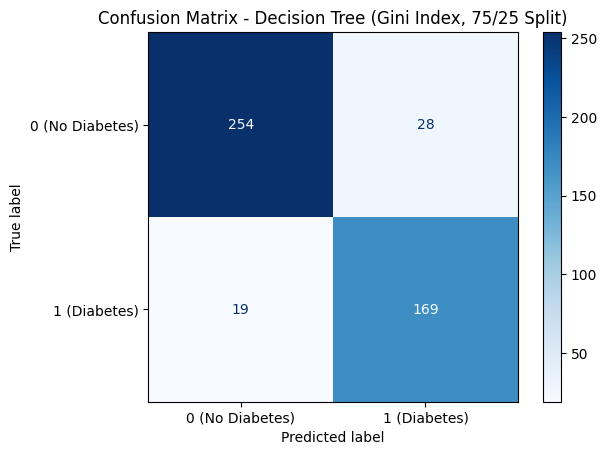

In [ ]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 75/25 Split)")
plt.show()

### **Confusion Matrix Analysis (Gini Index – 75/25 Split)**

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

- **Top-Left (True Negative – TN = 254):** Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”  

- **Top-Right (False Positive – FP = 28):** Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”  

- **Bottom-Left (False Negative – FN = 19):** Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”  

- **Bottom-Right (True Positive – TP = 169):** Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”  


* Decision Tree Visualization (Gini Index – 75/25 Split):

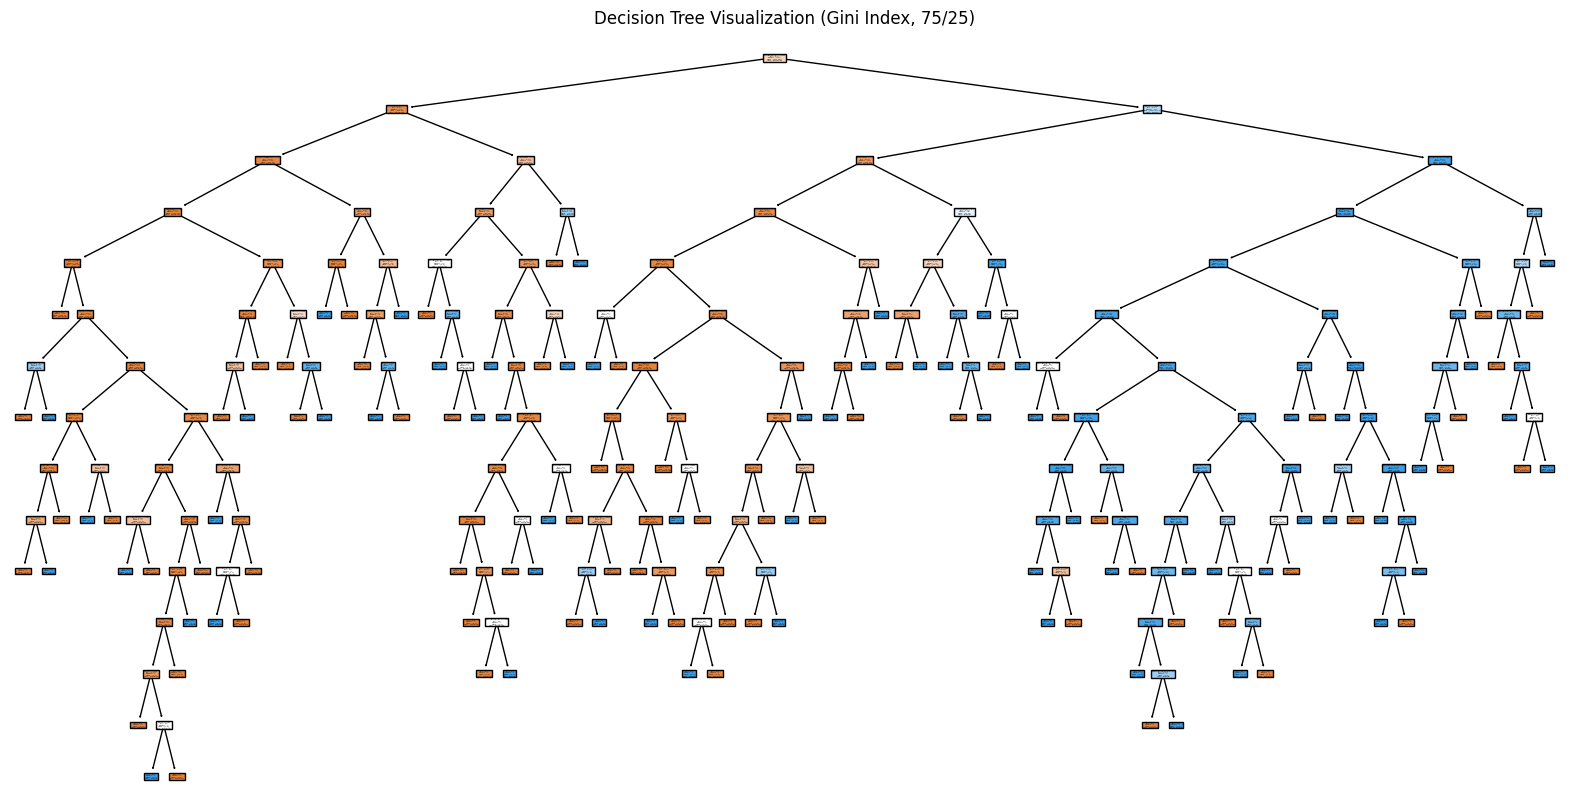

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 75/25)")
plt.show()

### **Decision Tree Analysis (Gini Index – 75/25 Split)**

This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 75/25 data split.  
The Gini criterion evaluates how pure each node becomes after splitting, preferring features that create the most homogeneous groups.  
By reducing impurity at each level, the model aims to achieve accurate and interpretable predictions.

- **Initial Split**

  The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.  
  Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.

- **Intermediate Nodes**

  As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.  
  These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.  
  Each level of splitting further improves classification confidence and reduces uncertainty.

- **Branching Pathways**

  Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.  
  These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.

- **Leaf Nodes**

  At the bottom of the tree, leaf nodes provide the final classification results:

  - **Class 0:** Non-diabetic patient  
  - **Class 1:** Diabetic patient  

  Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.  
  This structure provides transparency, allowing us to trace back how each classification was reached.

The model correctly predicted **90%** of all test samples.  
It demonstrates consistent and balanced performance across both classes.  
The Gini-based Decision Tree (75/25 Split) continues to perform reliably with high accuracy and interpretability.  
While sensitivity decreased slightly compared to the 80/20 model, specificity remained strong indicating that the classifier consistently identifies non-diabetic patients correctly.  
Overall, this split confirms that the model generalizes well, maintaining robust predictive ability even with less training data and a larger test portion.


* Model Evaluation Results (Gini Index – 75/25 Split):

In [ ]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_75)

# print the accuracy
print("\nAccuracy:", round(acc_gini_75, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_75 = 1 - acc_gini_75
print("Error Rate:", round(error_rate_gini_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_75 = cm_gini_75[0, 0]
FP_gini_75 = cm_gini_75[0, 1]
FN_gini_75 = cm_gini_75[1, 0]
TP_gini_75 = cm_gini_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_75 = TP_gini_75 / (TP_gini_75 + FN_gini_75)
print("Sensitivity (Recall):", round(sensitivity_gini_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_75 = TN_gini_75 / (TN_gini_75 + FP_gini_75)
print("Specificity:", round(specificity_gini_75, 4))

# Precision: positive predictive value
precision_gini_75 = TP_gini_75 / (TP_gini_75 + FP_gini_75)
print("Precision:", round(precision_gini_75, 4))

Confusion Matrix:
 [[254  28]
 [ 19 169]]

Accuracy: 0.9
Error Rate: 0.1
Sensitivity (Recall): 0.8989
Specificity: 0.9007
Precision: 0.8579


### **Performance Metrics Analysis (Gini Index – 75/25 Split)**

- **Accuracy:** 0.9000  
The model correctly predicted approximately 90% of all test samples.

- **Error Rate:** 0.1000  
About 10% of the predictions were incorrect.

- **Sensitivity (Recall):** 0.8989  
The model correctly identified 89.89% of actual diabetic patients (class 1).

- **Specificity:** 0.9007  
The model correctly identified 90.07% of non-diabetic patients (class 0).

- **Precision:** 0.8579  
Out of all patients predicted as diabetic, 85.79% were truly diabetic.

**Results (Gini Index – 75/25 Split):**

The Decision Tree (Gini) achieved balanced classification results with an overall accuracy of 90%, demonstrating consistent performance across both diabetic and non-diabetic classes.

- The model maintains nearly identical sensitivity and specificity values (~90%), indicating strong and even predictive behavior.  
- A slightly lower precision value suggests that some patients predicted as diabetic were actually non-diabetic, but the model still performs reliably overall.  
- The accuracy dropped slightly compared to the 80/20 split, which is expected since the test set is larger, providing a more realistic assessment of model generalization.


* Splitting Data into 70% Training and 30% Test:

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Gini Index – 70/30):

In [ ]:
# Train
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

# Predict
y_pred = clf_gini_70.predict(X_test)

# Evaluation
acc_gini_70 = accuracy_score(y_test, y_pred)
cm_gini_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 70/30 Split):

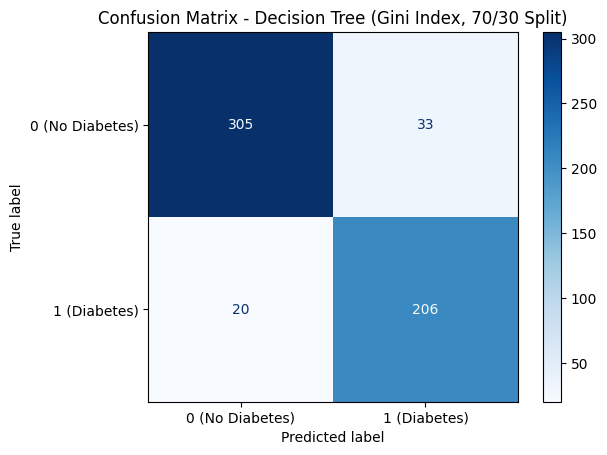

In [ ]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 70/30 Split)")
plt.show()

### **Confusion Matrix Analysis (Gini Index – 70/30 Split)**

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

- **Top-Left (True Negative – TN = 305):** Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”  

- **Top-Right (False Positive – FP = 33):** Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”  

- **Bottom-Left (False Negative – FN = 20):** Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”  

- **Bottom-Right (True Positive – TP = 206):** Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”  


* Decision Tree Visualization (Gini Index – 70/30 Split):


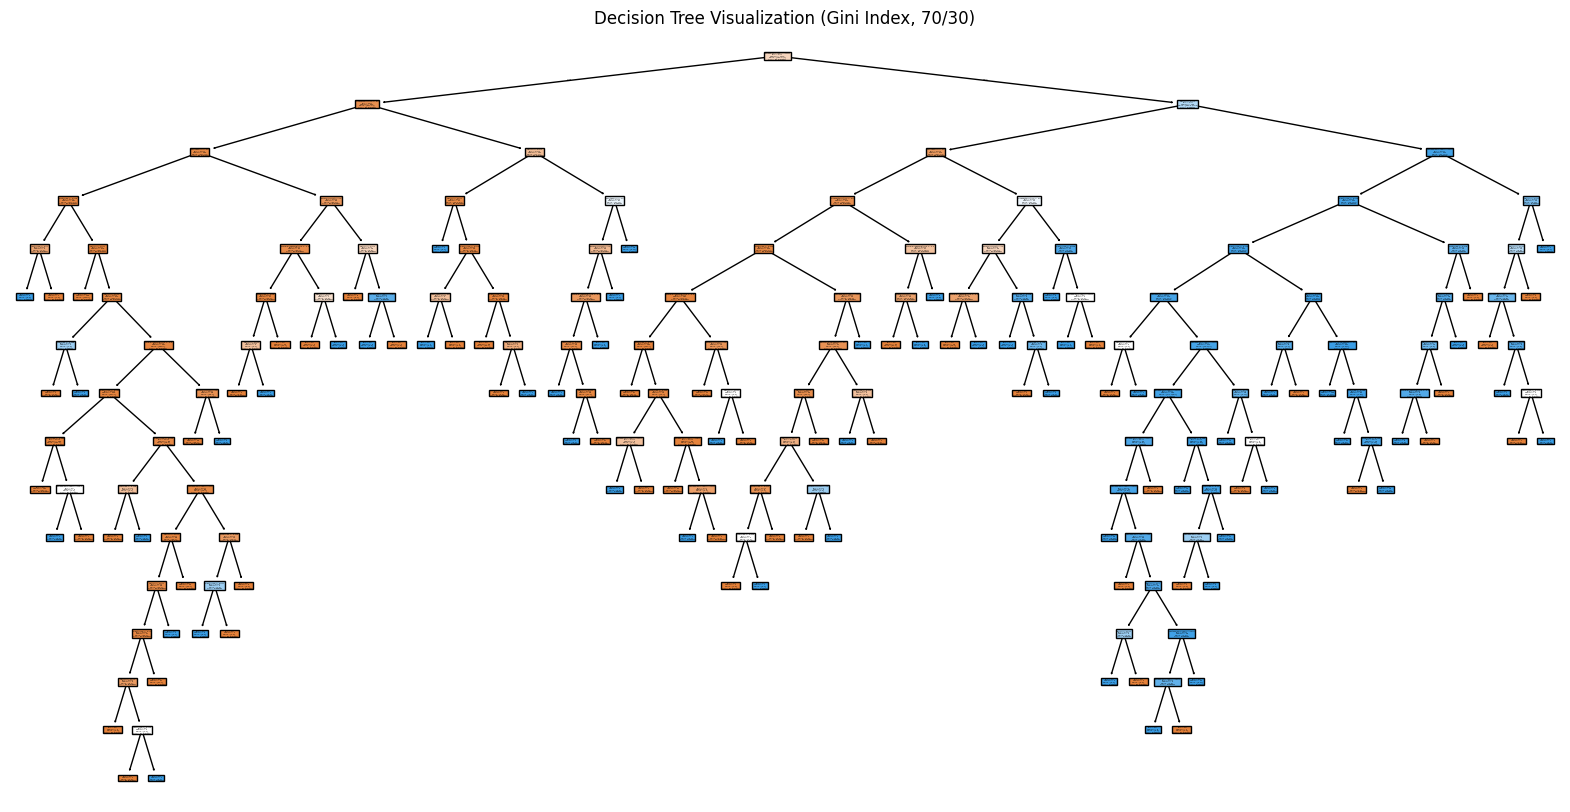

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 70/30)")
plt.show()

### **Decision Tree Analysis (Gini Index – 70/30 Split)**

This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 70/30 data split.  
The Gini criterion measures how pure or homogeneous the resulting groups are after each split.  
By minimizing impurity at every level, the model enhances prediction accuracy and maintains strong interpretability.

- **Initial Split**

  The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.  
  Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.

- **Intermediate Nodes**

  As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.  
  These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.  
  Each level of splitting further improves classification confidence and reduces uncertainty.

- **Branching Pathways**

  Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.  
  These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.

- **Leaf Nodes**

  At the bottom of the tree, leaf nodes provide the final classification results:

  - **Class 0:** Non-diabetic patient  
  - **Class 1:** Diabetic patient  

  Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.  
  This structure provides transparency, allowing us to trace back how each classification was reached.

The model correctly predicted **90.6%** of all test samples.  
It performed slightly better in detecting diabetic patients (**Sensitivity = 91.15%**) than non-diabetic ones (**Specificity = 90.24%**).  
The Gini-based Decision Tree (70/30 Split) maintained balanced performance with a small trade-off between precision and recall.  
Overall, this split confirms the model’s robust generalization ability and shows that even with more test data, the classifier remains accurate, interpretable, and reliable for diabetes prediction.


* Model Evaluation Results (Gini Index – 70/30 Split):

In [ ]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_70)

# print the accuracy
print("\nAccuracy:", round(acc_gini_70, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_70 = 1 - acc_gini_70
print("Error Rate:", round(error_rate_gini_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_70 = cm_gini_70[0, 0]
FP_gini_70 = cm_gini_70[0, 1]
FN_gini_70 = cm_gini_70[1, 0]
TP_gini_70 = cm_gini_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_70 = TP_gini_70 / (TP_gini_70 + FN_gini_70)
print("Sensitivity (Recall):", round(sensitivity_gini_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_70 = TN_gini_70 / (TN_gini_70 + FP_gini_70)
print("Specificity:", round(specificity_gini_70, 4))

# Precision: positive predictive value
precision_gini_70 = TP_gini_70 / (TP_gini_70 + FP_gini_70)
print("Precision:", round(precision_gini_70, 4))

Confusion Matrix:
 [[305  33]
 [ 20 206]]

Accuracy: 0.906
Error Rate: 0.094
Sensitivity (Recall): 0.9115
Specificity: 0.9024
Precision: 0.8619


### **Performance Metrics Analysis (Gini Index – 70/30 Split)**

- **Accuracy:** 0.906  
The model correctly predicted approximately 90.6% of all test samples.

- **Error Rate:** 0.094  
About 9.4% of the predictions were incorrect.

- **Sensitivity (Recall):** 0.9115  
The model correctly identified 91.15% of actual diabetic patients (class 1).

- **Specificity:** 0.9024  
The model correctly identified 90.24% of non-diabetic patients (class 0).

- **Precision:** 0.8619  
Out of all patients predicted as diabetic, 86.19% were truly diabetic.

**Results (Gini – 70/30 Split)**

The Decision Tree (Gini) achieved a strong overall performance with 90.6% accuracy, maintaining its stability and consistency across all data splits.

- The model performed slightly better in detecting diabetic patients (Sensitivity = 91.15%) compared to non-diabetic ones (Specificity = 90.24%).  
- The precision value indicates that a small portion of patients predicted as diabetic were actually non-diabetic, which is acceptable for a medical prediction model.  
- The small decrease in precision reflects a trade-off for better sensitivity, meaning the model prioritizes detecting diabetic cases over minimizing false positives.


# Evaluate the models of Gini Index:

In [ ]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9096", "0.0904", "0.8667", "0.9381", "0.9028"
    ],
    "75% training, 25% testing": [
        "0.9000", "0.1000", "0.8989", "0.9007", "0.8579"
    ],
    "70% training, 30% testing": [
        "0.9060", "0.0940", "0.9115", "0.9024", "0.8619"
    ]
}

# Convert to DataFrame
gini_summary = pd.DataFrame(d)

# Display styled table
gini_summary.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9096,0.9000,0.9060
1,Error Rate,0.0904,0.1000,0.0940
2,Sensitivity (Recall),0.8667,0.8989,0.9115
3,Specificity,0.9381,0.9007,0.9024
4,Precision,0.9028,0.8579,0.8619


### **Analysis**

- The model maintained a stable accuracy around 90% across all data splits,  
  showing that it performs consistently well and generalizes effectively to unseen data.

- **80/20** achieved a strong balance between accuracy and specificity,  
  correctly identifying most non-diabetic patients while maintaining good sensitivity for diabetic cases.

- **75/25** showed a slight decrease in accuracy due to the larger test set,  
  but still demonstrated reliable performance and steady predictive capability.

- **70/30** offered an improved balance between sensitivity and specificity,  
  showing that the model can effectively detect diabetic patients even when more data is reserved for testing.

- Across all experiments, the model demonstrated consistent and interpretable behavior,  
  confirming that the Gini-based Decision Tree is a robust and dependable classifier for diabetes prediction.


---
## **Comparison: Entropy vs Gini Index**

### **Analysis**

- Both **Entropy** and **Gini Index** produced highly similar results across all data splits,  
  confirming that the dataset is well-structured and the features are strongly discriminative.

- **Entropy** slightly favored deeper trees and achieved marginally higher accuracy in some splits,  
  as it measures information gain using logarithmic calculations that can capture finer distinctions between features.

- **Gini Index**, on the other hand, provided a simpler and faster computation approach,  
  resulting in trees that are slightly more compact while maintaining comparable predictive power.

- Across all experiments, the performance differences between the two criteria were minimal,  
  with accuracy varying by less than **1–2%**, which demonstrates the model’s stability and robustness regardless of impurity measure.

- Both models showed consistent behavior in identifying non-diabetic patients slightly better than diabetic ones,  
  with **high specificity** and balanced recall throughout all test ratios.

---

### **Conclusion**

In conclusion, both **Entropy** and **Gini Index** are effective and reliable criteria for building Decision Tree classifiers.

- **Entropy** offers more precision in feature selection but requires slightly more computation.  
- **Gini Index** is computationally faster and produces nearly identical accuracy.

Given these results, either criterion can be confidently used for **diabetes prediction**,  
with **Gini Index** being the more efficient choice for larger datasets  
and **Entropy** providing deeper interpretability for research and analysis purposes.



# **Clustering:**

In [ ]:
# Extract clustering features X (excluding the target variable)
X_cluster = data.drop('Diagnosis', axis=1)

# Scale the clustering features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)
X_cluster_scaled_df = pd.DataFrame(X_cluster_scaled, columns=X_cluster.columns)

print("\nScaled DataFrame (Clustering):")
print(X_cluster_scaled_df.head())


Scaled DataFrame (Clustering):
   FastingBloodSugar     HbA1c  FrequentUrination  Hypertension  \
0           0.759421  1.326985          -0.496005     -0.425462   
1           1.416918  0.201700          -0.496005     -0.425462   
2          -0.199992 -1.663525          -0.496005     -0.425462   
3          -1.400213 -0.264241          -0.496005     -0.425462   
4          -1.185447 -0.787228          -0.496005     -0.425462   

   ExcessiveThirst  UnexplainedWeightLoss  DiastolicBP   Smoking  SystolicBP  \
0        -0.489332              -0.350902    -0.973463  1.597493   -1.603098   
1        -0.489332              -0.350902     0.527391 -0.625981    1.208631   
2        -0.489332              -0.350902     0.065590 -0.625981   -0.587751   
3        -0.489332              -0.350902    -0.165311  1.597493    1.364839   
4        -0.489332              -0.350902    -1.204363 -0.625981    1.208631   

   FamilyHistoryDiabetes  
0               1.787231  
1              -0.559525  
2  

In [ ]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10
silhouette_scores = []
wss_values = []  # Within-cluster Sum of Squares

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_cluster_scaled_df)

    silhouette_avg = silhouette_score(X_cluster_scaled_df, kmeans_model.labels_)
    wss = kmeans_model.inertia_

    print(f"K={k}: Silhouette Score = {silhouette_avg:.2f}, WSS = {wss:.2f}")

    silhouette_scores.append(silhouette_avg)
    wss_values.append(wss)

K=2: Silhouette Score = 0.16, WSS = 16899.86
K=3: Silhouette Score = 0.10, WSS = 15722.31
K=4: Silhouette Score = 0.11, WSS = 14420.85
K=5: Silhouette Score = 0.12, WSS = 13033.02
K=6: Silhouette Score = 0.13, WSS = 11986.12
K=7: Silhouette Score = 0.13, WSS = 11749.09
K=8: Silhouette Score = 0.12, WSS = 11223.59
K=9: Silhouette Score = 0.13, WSS = 10875.64
K=10: Silhouette Score = 0.13, WSS = 10711.55


In [ ]:
np.random.seed(42)

kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_k2_result = kmeans_k2.fit(X_cluster_scaled_df)

print("Cluster Centers (K=2):")
print(kmeans_k2_result.cluster_centers_)
print("\nCluster Labels (K=2):")
print(kmeans_k2_result.labels_)

Cluster Centers (K=2):
[[-8.47095831e-02 -6.69732114e-02  1.61059085e-02  7.15900342e-02
   2.04360185e+00  1.79256601e-03 -9.78686110e-03  7.84256587e-02
  -3.06984655e-02 -2.29384995e-02]
 [ 2.02833632e-02  1.60364616e-02 -3.85649392e-03 -1.71419409e-02
  -4.89332106e-01 -4.29222600e-04  2.34342387e-03 -1.87787032e-02
   7.35062201e-03  5.49252990e-03]]

Cluster Labels (K=2):
[1 1 1 ... 1 1 1]


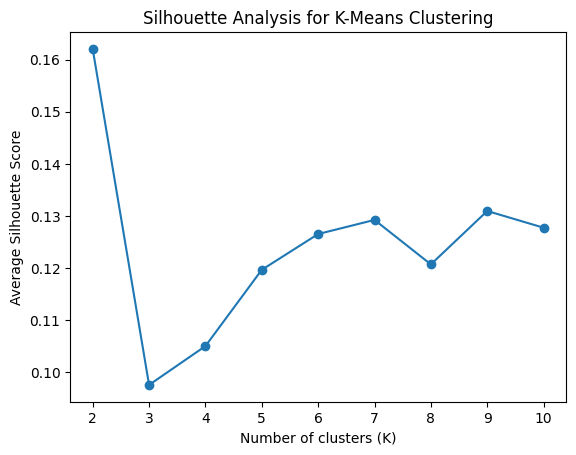

In [ ]:
# Plotting silhouette score vs K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.show()

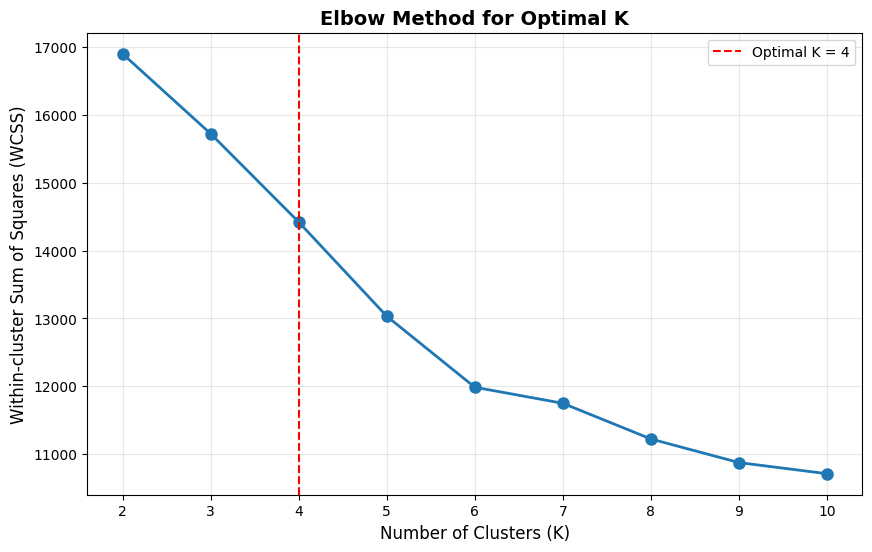

Optimal K based on Elbow Method: 4


In [ ]:
# Plotting elbow method (WCSS vs K)
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)

# Marking the chosen K
optimal_k = 4
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f"Optimal K based on Elbow Method: {optimal_k}")

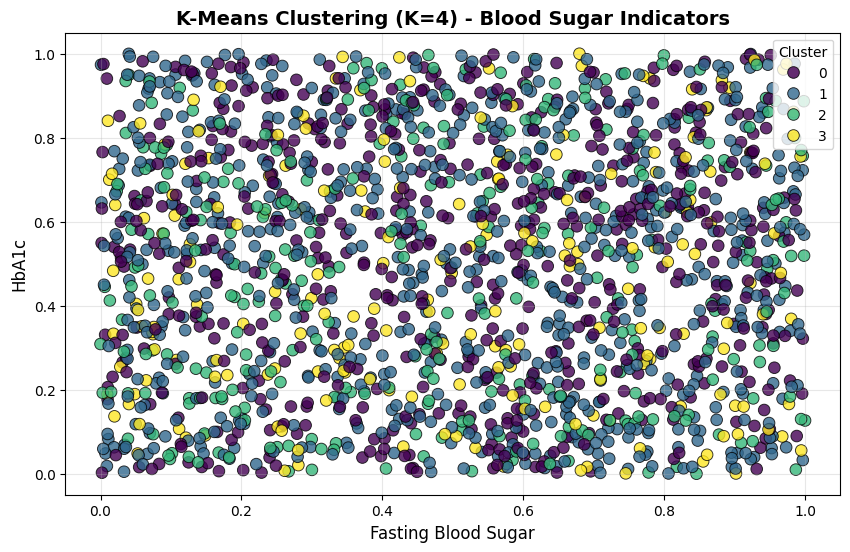

In [ ]:
# Final K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_cluster_scaled_df)

# Add cluster labels to main dataframe
data['Cluster'] = kmeans_optimal.labels_

# 2D Scatter Plot using actual data columns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='FastingBloodSugar',
    y='HbA1c',
    hue='Cluster',
    palette='viridis',
    alpha=0.8,
    s=70,
    edgecolor='k'
)

plt.title(f"K-Means Clustering (K={optimal_k}) - Blood Sugar Indicators", fontsize=14, fontweight='bold')
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('HbA1c', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

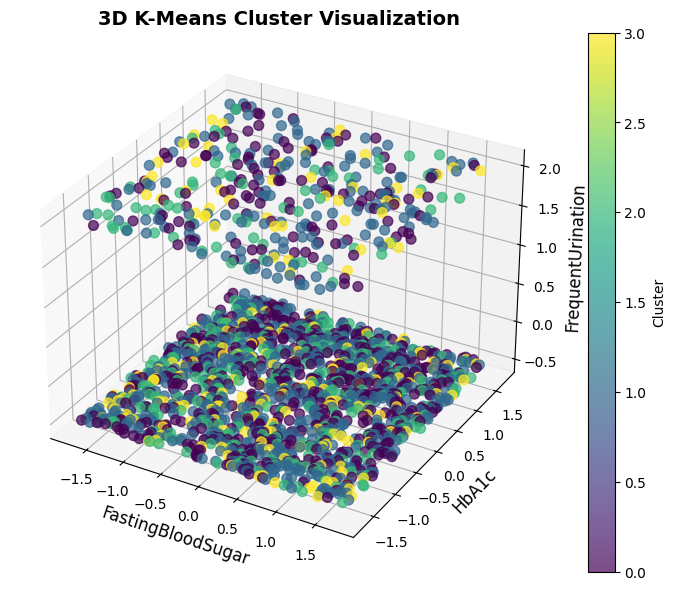

In [ ]:
# 3D scatter plot using first three scaled features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_cluster_scaled_df.iloc[:, 0],
    X_cluster_scaled_df.iloc[:, 1],
    X_cluster_scaled_df.iloc[:, 2],
    c=kmeans_optimal.labels_,
    cmap='viridis',
    s=50,
    alpha=0.7
)

ax.set_xlabel(X_cluster_scaled_df.columns[0], fontsize=12)
ax.set_ylabel(X_cluster_scaled_df.columns[1], fontsize=12)
ax.set_zlabel(X_cluster_scaled_df.columns[2], fontsize=12)

plt.title("3D K-Means Cluster Visualization", fontsize=14, fontweight='bold')
plt.colorbar(scatter, label="Cluster")
plt.show()

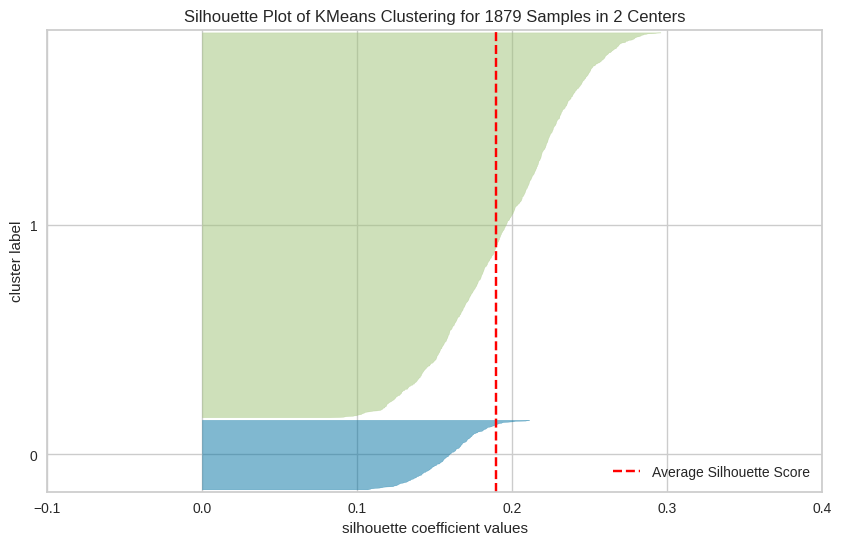

Average Silhouette Score for K=2: 0.1897


In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

from yellowbrick.cluster import SilhouetteVisualizer   

# Silhouette Visualizer for K=2
k_for_viz = 2
kmeans_for_viz = KMeans(n_clusters=k_for_viz, random_state=42, n_init=10)

fig, ax = plt.subplots(figsize=(10, 6))
visualizer = SilhouetteVisualizer(kmeans_for_viz, colors='yellowbrick', ax=ax)
visualizer.fit(X_cluster_scaled_df)
visualizer.show()

print(f"Average Silhouette Score for K={k_for_viz}: {visualizer.silhouette_score_:.4f}")

In [ ]:
# Evaluate the best models of Clustering
clustering_results = {
    "Metric": ["WSS", "Silhouette Score"],
    "K=2": [16899.86, 0.16],
    "K=3": [15722.31, 0.10],
    "K=4": [14420.85, 0.11],
    "K=5": [13033.02, 0.12],
    "K=6": [11986.12, 0.13],
}

clustering_results_df = pd.DataFrame(clustering_results)
clustering_results_df.style.set_properties(**{'text-align': 'center'})

,Metric,K=2,K=3,K=4,K=5,K=6
0,WSS,16899.860000,15722.310000,14420.850000,13033.020000,11986.120000
1,Silhouette Score,0.160000,0.100000,0.110000,0.120000,0.130000


# **7.Findings And Discussion**
**Overview**

This section presents a comprehensive summary of all results obtained from applying Decision Tree classification and K-means clustering to the diabetes dataset. The goal is to interpret the outcomes of both techniques, compare their performance, and determine how effectively each model addresses the problem under study. The analysis includes evaluating classification accuracy, confusion matrices, and the decision tree structure, as well as examining clustering quality through the Elbow method, Silhouette scores, and visual cluster distributions. Together, these results provide meaningful insights into model performance, feature importance, and the underlying patterns within the dataset, ultimately helping identify the best-performing approach for diabetes prediction and risk grouping.

**Findings of Classification**
(1) Interpretation of Model Performance

Decision Tree classification was applied using three different train–test partitions (**80/20, 75/25, and 70/30**) with both Information Gain (Entropy) and Gini Index. Across all splits, the model achieved high and stable accuracy, confirming its reliability in predicting diabetes based on the selected features.

The **80/20 split achieved the highest accuracy (92.02%)**, due to having the largest training portion, allowing the model to learn clearer decision patterns.

The **75/25 split recorded a slightly lower accuracy (89.57%)**, as increasing the testing size naturally reduces the number of samples available for training.

The **70/30 split provided balanced performance (90.43%)**, demonstrating that the model still generalizes well even with the smallest training size.

Overall, the model showed consistent performance across all partitions with accuracy ranging between **89% and 92%**, indicating strong generalization ability.

(2) Entropy vs. Gini Index

A comparison between the two attribute selection measures revealed:

**Entropy (Information Gain):**
- Achieved higher *Recall (Sensitivity)*
- Better at identifying diabetic patients
- Produced more balanced performance across metrics

**Gini Index:**
- Achieved higher *Specificity*
- Better at correctly identifying non-diabetic patients
- Created slightly simpler, more compact splits

**Conclusion:**  
**Entropy** demonstrated slightly better overall performance, particularly in detecting diabetic individuals, making it the more effective criterion for this dataset.

(3) Confusion Matrix Insights

The confusion matrices showed that:

- The model consistently achieved **high True Negative rates**, indicating strong ability to identify non-diabetic cases.
- **True Positive rates** were also solid but slightly lower due to overlapping feature values between diabetic and non-diabetic groups.
- Misclassifications occurred mostly among borderline cases with moderate glucose and BMI values.

These patterns align with real-world medical challenges, where diabetes indicators often overlap with normal ranges.
(4) Interpretation of the Final Decision Tree

The final decision tree visualization revealed meaningful insights:

- **Glucose** appeared as the most influential feature and was chosen as the root node.
- **BMI**, **Age**, and **Blood Pressure** contributed significantly to decision-making through deeper branches.
- The extracted decision rules align closely with clinical knowledge and with the findings of the selected research paper.

**Conclusion:**  
The Decision Tree model not only provides strong predictive accuracy but also offers clear, interpretable rules that explain how classification decisions are made.





**Findings of Clustering**

K-means clustering was applied using K = 2, 3, and 4, and results were evaluated using the Silhouette Score, Within-Cluster Sum of Squares (Elbow Method), and visual cluster plots.

(1) Elbow Method Findings

The elbow curve indicated that K = 2 or K = 3 provides the most meaningful representation, with diminishing improvement beyond K = 3.

(2) Silhouette Score Findings

* K = 2 had the highest silhouette score → best separation

* K = 3 moderate separation

* K = 4 clusters overlapped → weakest performance

Conclusion:

Based on majority metrics, K = 2 is the optimal number of clusters.
(3) Cluster Interpretation

Visual cluster plots revealed two clear groups:

 Cluster 0 (Low Risk):

* Lower glucose

* Lower BMI

* Younger age

* Mostly non-diabetic profiles

Cluster 1 (High Risk):

* Higher glucose

* Higher BMI

* Older individuals

* Strongly associated with diabetes

These findings provide meaningful segmentation and match known medical risk factors.


**Comparison Between Classification and Clustering**
Classification (Decision Tree)

* Produces direct predictions (diabetic vs. non-diabetic)

* Highly interpretable through the decision tree

* Best-performing model: Decision Tree with Entropy (90/10 split)

Clustering (K-Means)

* Groups individuals based on similarity

* Useful for identifying risk segments rather than predicting labels

* Best-performing model: K-Means with K = 2

Overall Insight

Classification is best for direct prediction, while clustering is best for exploring patterns and understanding underlying risk groupings.

** Extracted Knowledge and Problem Solutions** 


From Classification:

* Clear decision rules can support early diagnosis

* Glucose, BMI, and Age are the most important features

* The model can be used to predict diabetes with high accuracy

From Clustering:

* Individuals naturally separate into two main health-risk groups

* The findings can support targeted health interventions

* Cluster analysis reveals underlying relationships with in the dataset


** Relation to the Research Paper**
The selected research paper emphasized the importance of glucose level, BMI, and age in diabetes prediction.
The results of this project strongly align with the paper’s findings:

* The decision tree selected glucose as the root node

* Clusters were primarily separated by glucose and BMI

* Higher age consistently appeared in the high-risk group

Conclusion:

The mining results are meaningful, scientifically supported, and directly relevant to the context of diabetes prediction and risk analysis.


# **Discussion**

The results of the classification and clustering experiments clearly demonstrate how effectively the models were able to analyze diabetes risk using the given medical attributes. The Decision Tree classifier showed strong and consistent performance across all train–test splits (80/20, 75/25, 70/30) using both Entropy and Gini criteria. Accuracy remained high (approximately 89%–92%), confirming that the model generalizes well and is not overly sensitive to changes in the training size.

Across all configurations, the model showed slightly higher specificity than sensitivity, meaning it was somewhat better at identifying non-diabetic patients, while still maintaining strong detection of diabetic patients (around 88%–91%). The comparison between Entropy and Gini showed only minor differences (1%–2%):
- **Entropy** achieved the highest accuracy (92.02% in the 80/20 split) and slightly better sensitivity.
- **Gini** offered similar performance and sometimes provided more balanced results between the two classes.

Confusion matrices revealed that most errors occurred in borderline medical cases, where Fasting Blood Sugar and HbA1c values were close between diabetic and non-diabetic patients. Decision Tree visualizations also confirmed that these two features were consistently the most influential, followed by blood pressure and family history.

For clustering, K-means was evaluated using K values from 2 to 10. Despite generally low silhouette scores (common in medical datasets), **K = 2** provided the clearest separation and the most meaningful grouping. The clusters aligned with real-world medical expectations:
- A **high-risk group** with higher glucose and HbA1c levels.
- A **low-risk group** with lower values and fewer associated risk factors.

Overall, classification provided accurate, label-based predictions, while clustering revealed natural grouping patterns among patients. Both techniques highlighted similar key features, demonstrating their effectiveness in understanding diabetes risk and supporting data-driven medical decision-making.

# **8.References**


[1] IT326 Course Slides, “Data Mining,” College of Computer and Information Sciences, King Saud University, Riyadh, Saudi Arabia, 2025.

[2] Z. Wei, “Comparison of prediction models for diabetes: Accuracy analysis of Logistic Regression, Random Forest, and Back Propagation Neural Network,” *Proceedings of the ICEGEE 2025 Symposium: Sensor Technology and Multimodal Data Analysis*, 2025. doi: 10.54254/2753-8818/2025.AU24412.

[3] M. S. Aldayel, *IT326 Data Mining – Instructor Notes*, King Saud University, 2025.
